In [28]:
import os
import sys
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, os.path.join(cwd, "../"))

import pickle
import numpy as np
import torch
import src.utils.data_conversion_utils as conversions
import src.bin.validations as validations
import src.utils.print_utils as debug
import src.models.grud as grud 
import src.data_manager.student_life_var_binned_data_manager as data_manager
import src.bin.trainer as trainer
import importlib
import src.bin.tensorify as tensorify
import pandas as pd

from src import definitions
from src.bin import statistics
from src.bin import plotting
from sklearn import metrics
from src.utils.read_utils import read_pickle

pd.set_option('max_rows', 10000)

importlib.reload(validations)
importlib.reload(statistics)
importlib.reload(conversions)
importlib.reload(tensorify)
importlib.reload(grud)
importlib.reload(trainer)
importlib.reload(data_manager)
feature_list = data_manager.FEATURE_LIST

unnormalized_data = data_manager.get_data_for_training_in_dict_format(35, normalize=False, fill_na=False)
statistics_df, raw_df = statistics.get_statistics_on_data_dict(unnormalized_data, feature_list)
data = data_manager.get_data_for_training_in_dict_format(35, normalize=True, fill_na=True)

print(statistics.get_train_test_val_label_counts_from_raw_data(data))

data = conversions.convert_logical_not_missing_flags(data)
data = conversions.get_transposed_data(data)

      Train    Val    Test
--  -------  -----  ------
 0       12      8       5
 1        8      0      16
 2        0      0       4


In [29]:
data['train_ids'] = [
    '35_3_29_4',
'35_3_30_22',
'35_3_31_22',
'35_4_4_0',
'35_4_4_6',
'35_4_5_0',
'35_4_5_8',
'35_4_6_1',
'35_4_6_7',
'35_4_9_8',
'35_4_2_4',
'35_4_3_2',
'35_4_3_8',
'35_4_3_22',
'35_4_10_22',
'35_4_12_22',
'35_4_13_22',
'35_4_15_20',
'35_4_16_5',
'35_4_18_8',
'35_4_21_4',
'35_4_18_5',
'35_4_21_19',
'35_4_18_5',
'35_4_21_19',
'35_4_18_5',
'35_4_21_19',
'35_4_18_5',
'35_4_21_19',
    
]

data['test_ids'] = [
   
    '35_4_14_22',
'35_4_11_23',
'35_4_29_20',
'35_4_30_0',
'35_5_2_5',
'35_4_29_4'
]


data['val_ids'] = [
   
'35_4_20_3',
'35_5_7_21',
'35_5_8_19',
'35_5_19_19',
'35_5_21_9',
'35_5_12_21',
]

In [30]:
# GruD Parameters
first_key = next(iter(data['data'].keys()))
################################## Init ##################################
# Number of features in data.
input_size = len(data['data'][first_key][1])
# Number of classes. For student life it is 5.
output_size = 5 
# Same as input size.
hidden_size = input_size
# This is the sequence size
num_layers = 48
x_mean = statistics_df.loc['mean'].values
# Note :  GRUD accepts data with rows as features and columns as time steps! So we need to transpose the data.
dropout = 0.2

learning_rate = 0.001
n_epochs = 150

model = grud.GRUD(input_size = input_size,
             hidden_size= hidden_size,
             output_size=output_size,
             dropout=dropout, 
             dropout_type='mloss', 
             x_mean=x_mean, 
             num_layers=num_layers)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

data = tensorify.tensorify_data_gru_d(data)

xxxxxxxxxxxxxx epoch: 0 xxxxxxxxxxxxxx
val_loss:  9.476301789283752
test_loss:  9.59091305732727
train_loss:  46.31996989250183
train_preds:  [tensor(0), tensor(1), tensor(2), tensor(2), tensor(2), tensor(2), tensor(2), tensor(1), tensor(2), tensor(0), tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(2), tensor(0), tensor(2), tensor(0), tensor(2), tensor(1), tensor(2), tensor(2), tensor(2)]
val_preds:  [tensor(2), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(2)]
      Train    Val    Test
--  -------  -----  ------
 0        9      2       3
 1        6      3       2
 2       14      1       1


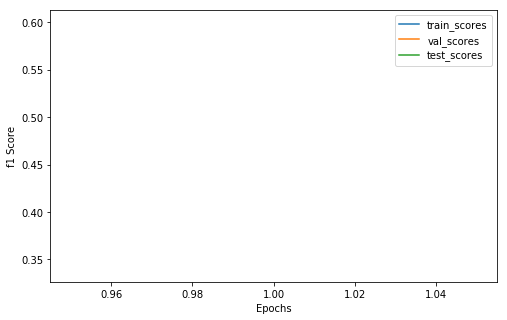

xxxxxxxxxxxxxx epoch: 1 xxxxxxxxxxxxxx
val_loss:  9.427675485610962
test_loss:  9.483803868293762
train_loss:  45.899004101753235
train_preds:  [tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(1), tensor(2), tensor(1), tensor(2), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(2), tensor(1), tensor(0), tensor(0), tensor(2), tensor(0), tensor(2), tensor(1), tensor(2), tensor(0), tensor(2), tensor(0), tensor(2)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       15      3       2
 1        4      3       4
 2       10      0       0


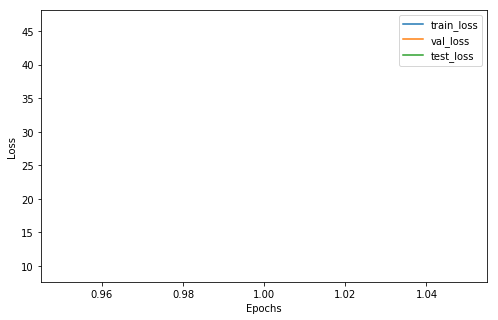

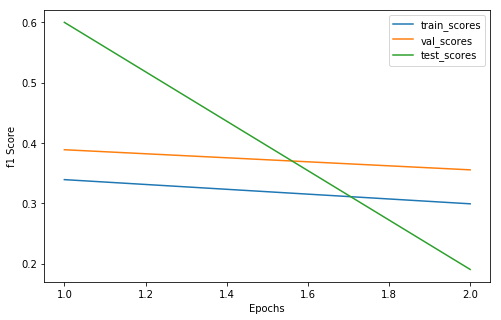

xxxxxxxxxxxxxx epoch: 2 xxxxxxxxxxxxxx
val_loss:  9.385752320289612
test_loss:  9.418860912322998
train_loss:  45.57838821411133
train_preds:  [tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(0), tensor(2), tensor(1), tensor(2), tensor(0), tensor(0), tensor(2), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(2)]
val_preds:  [tensor(1), tensor(2), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(2), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       18      2       2
 1        5      3       3
 2        6      1       1


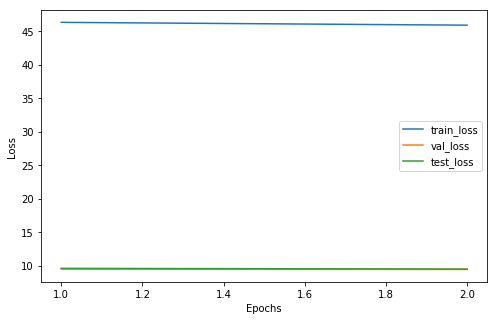

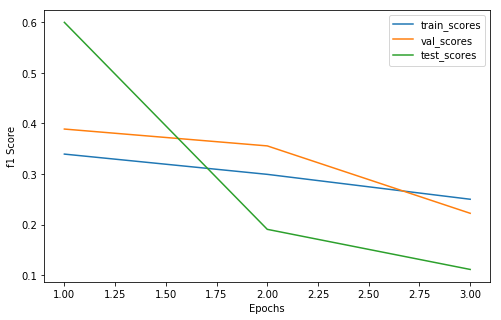

xxxxxxxxxxxxxx epoch: 3 xxxxxxxxxxxxxx
val_loss:  9.259550213813782
test_loss:  9.309314846992493
train_loss:  45.256272196769714
train_preds:  [tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(2), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(2), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(2), tensor(0), tensor(1), tensor(0), tensor(2), tensor(0), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(0), tensor(2), tensor(1), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       16      2       3
 1        7      3       3
 2        6      1       0


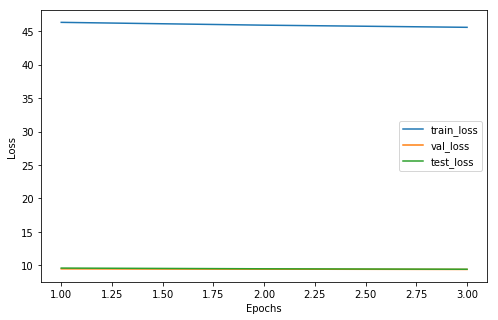

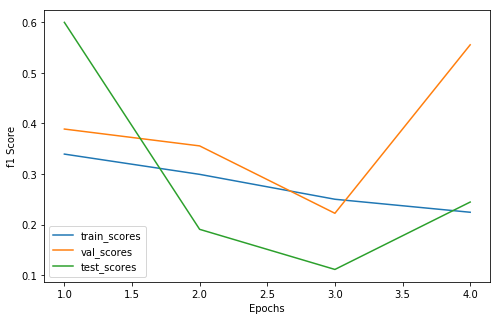

xxxxxxxxxxxxxx epoch: 4 xxxxxxxxxxxxxx
val_loss:  9.084178566932678
test_loss:  9.19100046157837
train_loss:  44.68536400794983
train_preds:  [tensor(0), tensor(1), tensor(2), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       21      4       4
 1        7      2       2
 2        1      0       0


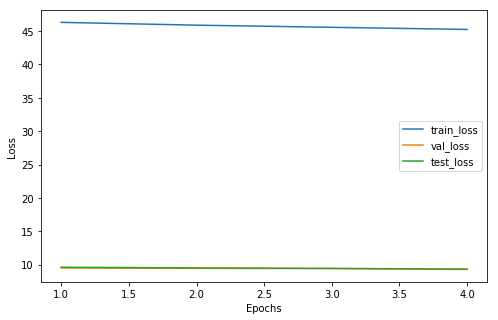

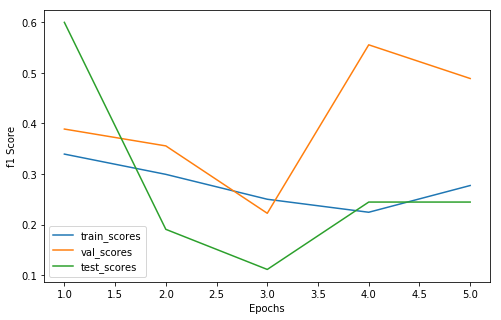

xxxxxxxxxxxxxx epoch: 5 xxxxxxxxxxxxxx
val_loss:  8.992973685264587
test_loss:  9.008801221847534
train_loss:  44.24384903907776
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(2), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       22      4       5
 1        6      2       1
 2        1      0       0


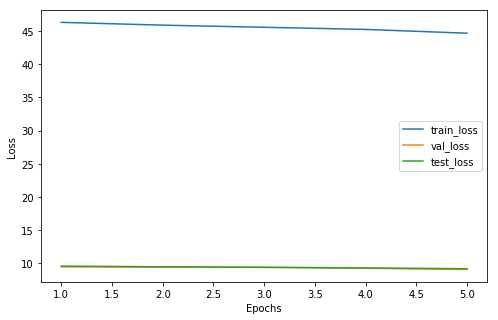

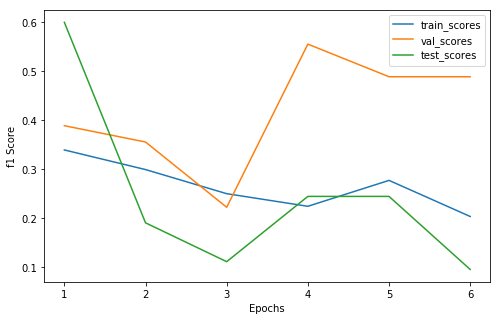

xxxxxxxxxxxxxx epoch: 6 xxxxxxxxxxxxxx
val_loss:  8.827534198760986
test_loss:  8.911919355392456
train_loss:  43.62018549442291
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       27      5       6
 1        2      1       0
 2        0      0       0


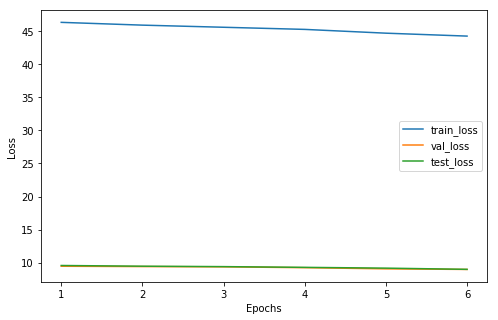

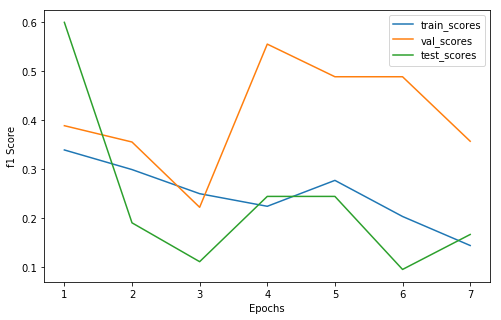

xxxxxxxxxxxxxx epoch: 7 xxxxxxxxxxxxxx
val_loss:  8.695900321006775
test_loss:  8.805119395256042
train_loss:  42.747639298439026
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       27      6       6
 1        2      0       0
 2        0      0       0


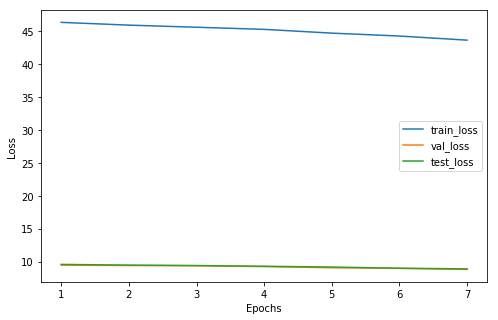

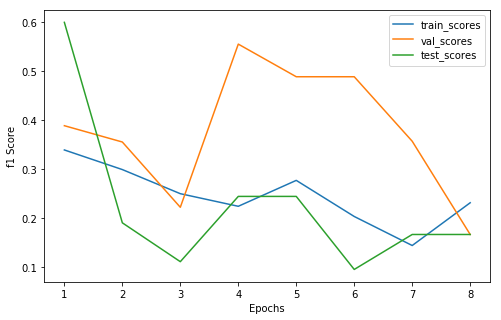

xxxxxxxxxxxxxx epoch: 8 xxxxxxxxxxxxxx
val_loss:  8.608296632766724
test_loss:  8.558887481689453
train_loss:  42.24690818786621
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       29      6       6
 1        0      0       0
 2        0      0       0


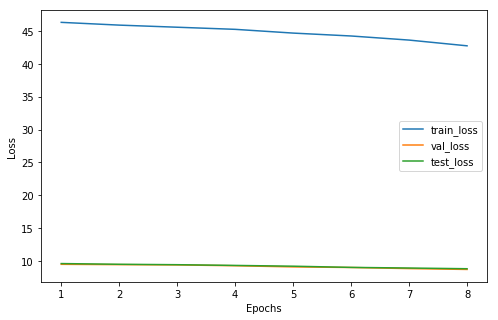

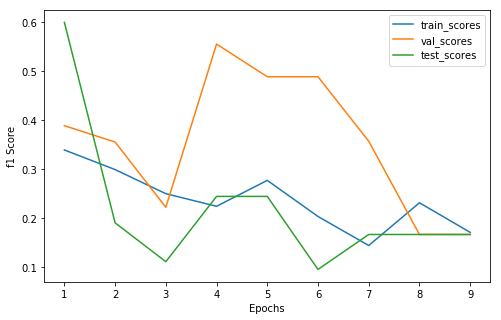

xxxxxxxxxxxxxx epoch: 9 xxxxxxxxxxxxxx
val_loss:  8.468784809112549
test_loss:  8.564330458641052
train_loss:  41.776442885398865
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       29      6       6
 1        0      0       0
 2        0      0       0


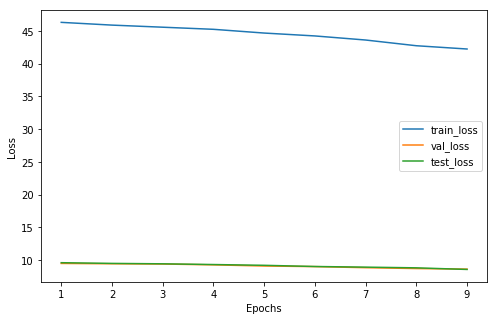

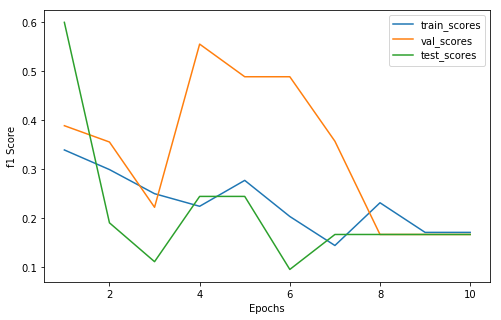

xxxxxxxxxxxxxx epoch: 10 xxxxxxxxxxxxxx
val_loss:  8.47070062160492
test_loss:  8.496779322624207
train_loss:  41.33005738258362
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       29      6       6
 1        0      0       0
 2        0      0       0


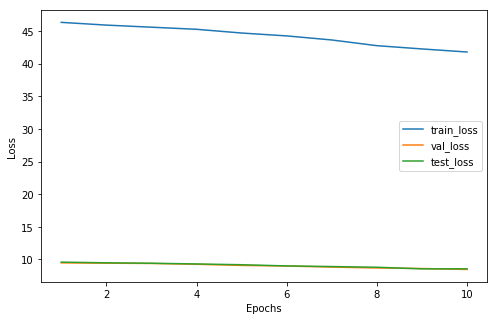

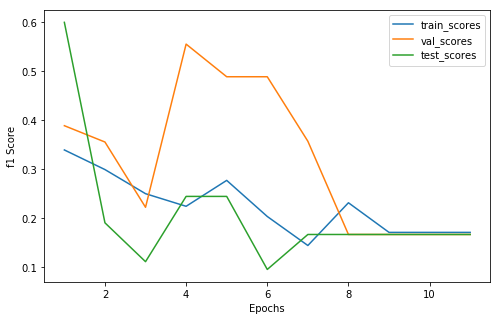

xxxxxxxxxxxxxx epoch: 11 xxxxxxxxxxxxxx
val_loss:  8.393717288970947
test_loss:  8.40963065624237
train_loss:  40.885796785354614
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       28      6       6
 1        1      0       0
 2        0      0       0


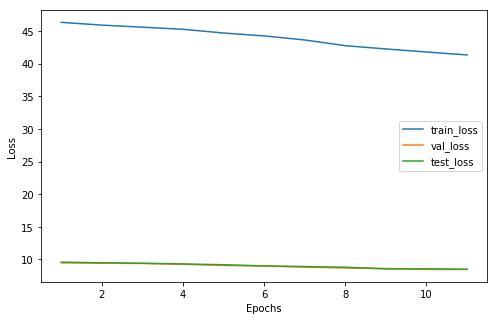

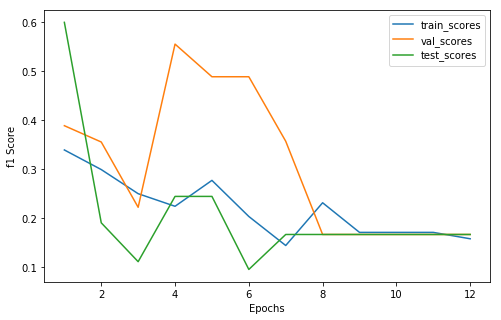

xxxxxxxxxxxxxx epoch: 12 xxxxxxxxxxxxxx
val_loss:  8.308467745780945
test_loss:  8.356417775154114
train_loss:  40.65637147426605
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       27      6       5
 1        2      0       1
 2        0      0       0


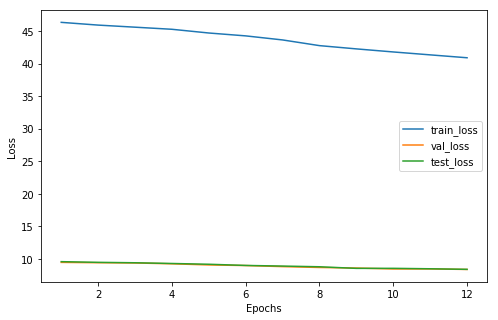

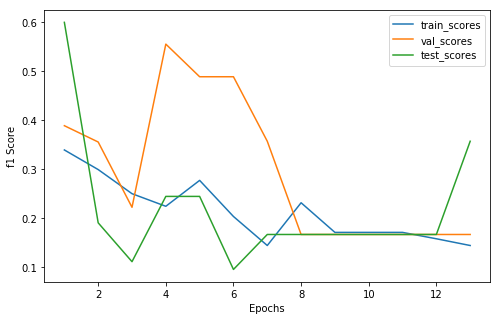

xxxxxxxxxxxxxx epoch: 13 xxxxxxxxxxxxxx
val_loss:  8.275097370147705
test_loss:  8.34356427192688
train_loss:  40.42593598365784
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       28      5       5
 1        1      1       1
 2        0      0       0


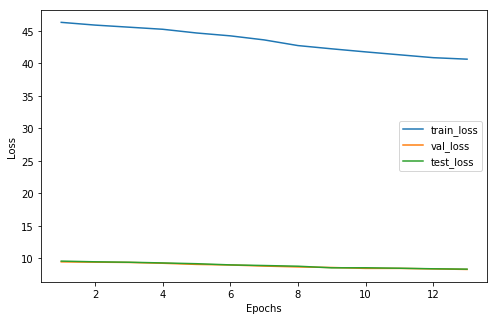

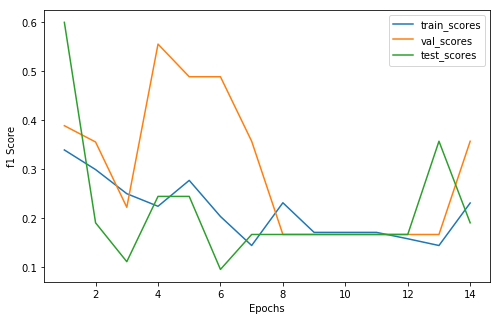

xxxxxxxxxxxxxx epoch: 14 xxxxxxxxxxxxxx
val_loss:  8.239453077316284
test_loss:  8.31533694267273
train_loss:  40.34670686721802
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       27      5       5
 1        2      1       1
 2        0      0       0


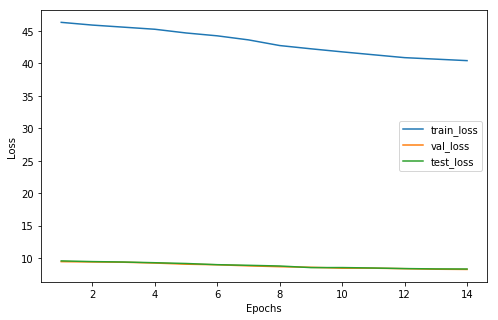

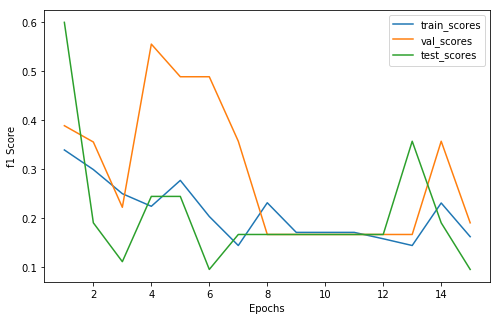

xxxxxxxxxxxxxx epoch: 15 xxxxxxxxxxxxxx
val_loss:  8.162461042404175
test_loss:  8.2366863489151
train_loss:  40.21242356300354
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       23      6       4
 1        6      0       2
 2        0      0       0


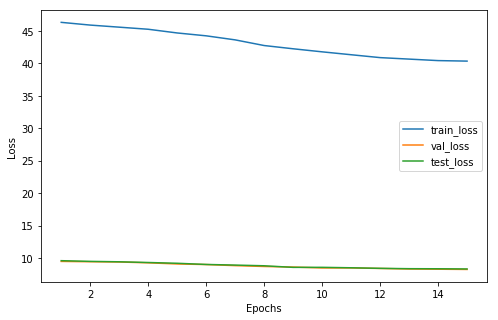

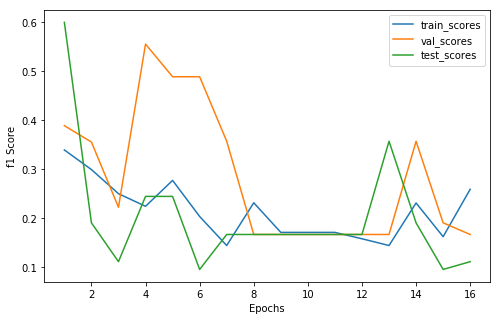

xxxxxxxxxxxxxx epoch: 16 xxxxxxxxxxxxxx
val_loss:  8.162354707717896
test_loss:  8.167036652565002
train_loss:  39.88844811916351
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       26      5       4
 1        3      1       2
 2        0      0       0


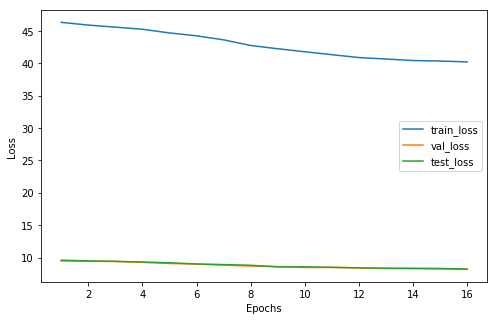

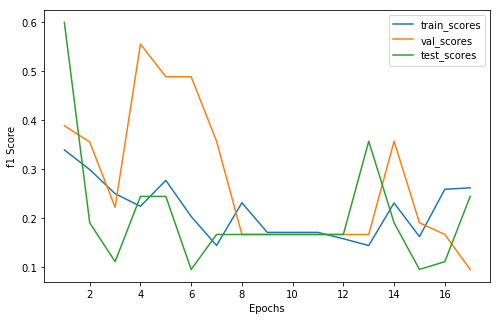

xxxxxxxxxxxxxx epoch: 17 xxxxxxxxxxxxxx
val_loss:  8.123341798782349
test_loss:  8.093016505241394
train_loss:  39.69971036911011
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       19      4       3
 1       10      2       3
 2        0      0       0


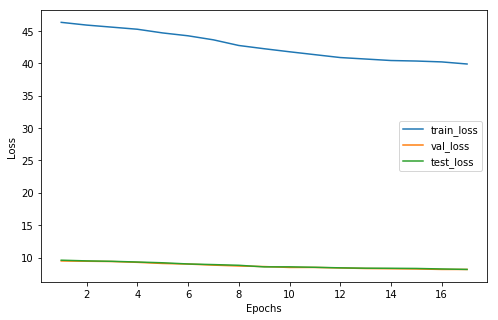

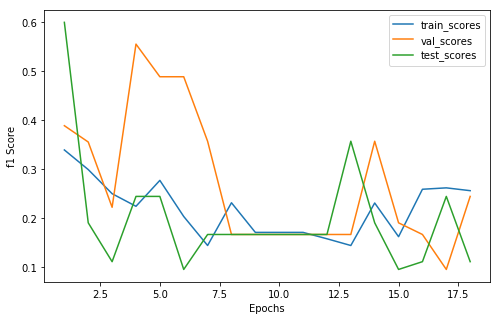

xxxxxxxxxxxxxx epoch: 18 xxxxxxxxxxxxxx
val_loss:  8.109578967094421
test_loss:  8.186517715454102
train_loss:  39.76684510707855
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       21      6       5
 1        8      0       1
 2        0      0       0


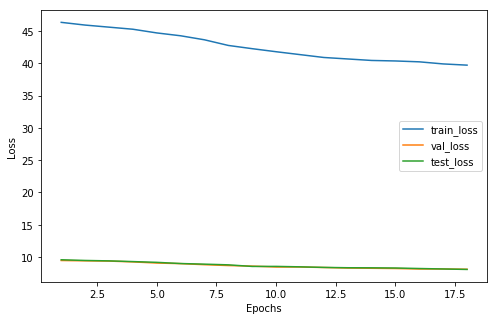

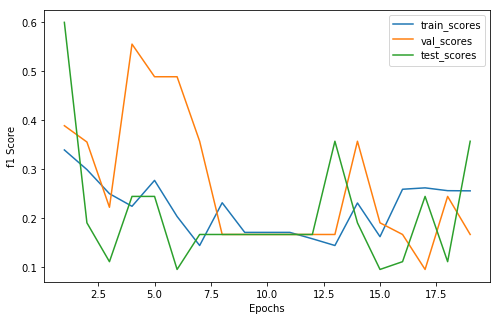

xxxxxxxxxxxxxx epoch: 19 xxxxxxxxxxxxxx
val_loss:  8.085320591926575
test_loss:  8.110081553459167
train_loss:  39.482025027275085
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       21      5       2
 1        8      1       4
 2        0      0       0


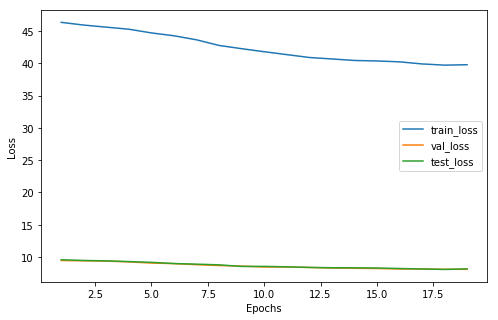

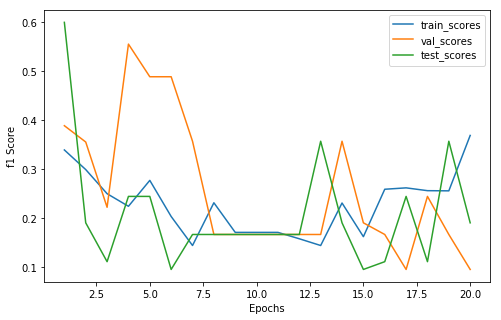

xxxxxxxxxxxxxx epoch: 20 xxxxxxxxxxxxxx
val_loss:  8.046099424362183
test_loss:  8.113386511802673
train_loss:  39.571059703826904
train_preds:  [tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       21      5       6
 1        8      1       0
 2        0      0       0


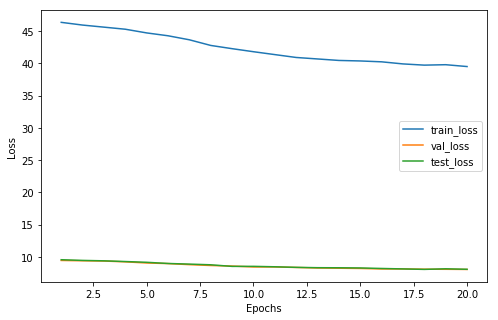

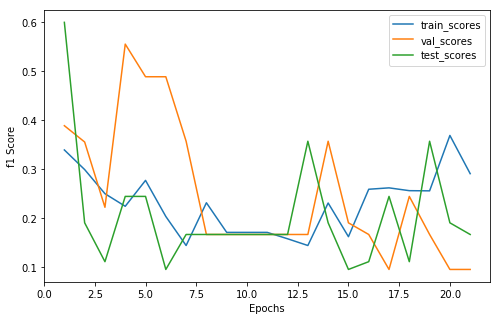

xxxxxxxxxxxxxx epoch: 21 xxxxxxxxxxxxxx
val_loss:  8.005561709403992
test_loss:  8.024359583854675
train_loss:  39.36066961288452
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       18      5       2
 1       11      1       4
 2        0      0       0


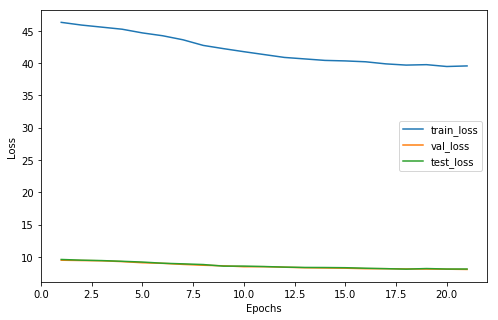

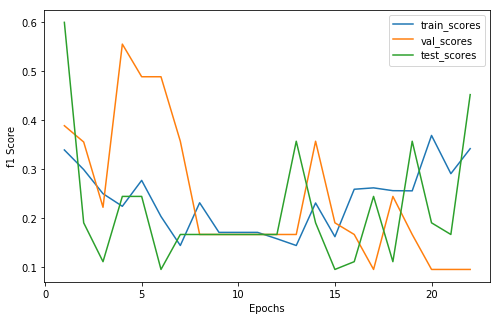

xxxxxxxxxxxxxx epoch: 22 xxxxxxxxxxxxxx
val_loss:  8.01455843448639
test_loss:  8.034160733222961
train_loss:  39.332637429237366
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       24      5       3
 1        5      1       3
 2        0      0       0


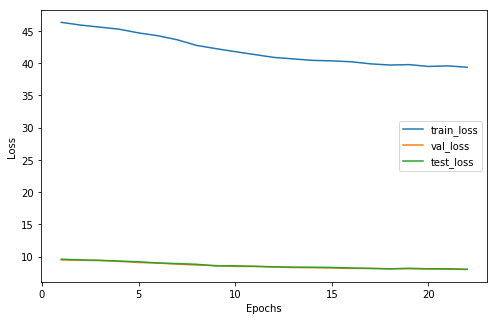

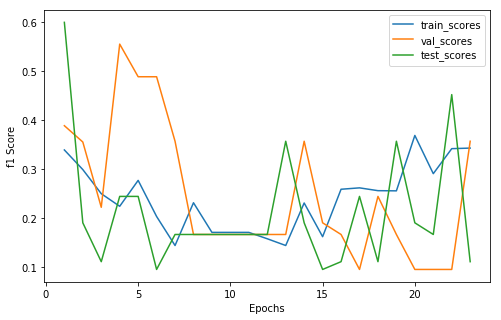

xxxxxxxxxxxxxx epoch: 23 xxxxxxxxxxxxxx
val_loss:  7.996685743331909
test_loss:  8.023271560668945
train_loss:  39.0645854473114
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       21      4       4
 1        8      2       2
 2        0      0       0


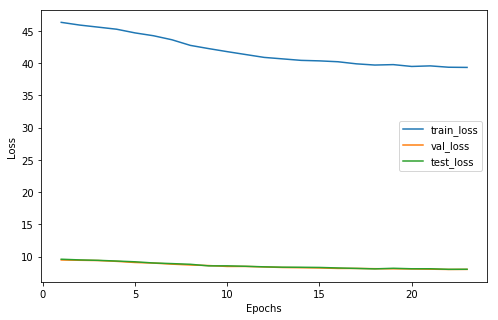

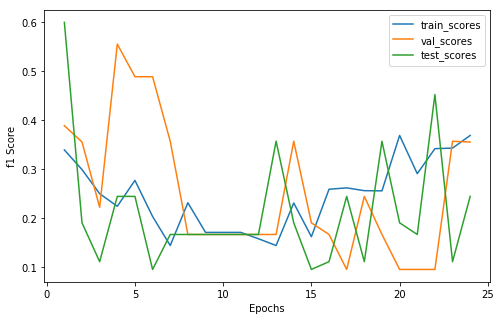

xxxxxxxxxxxxxx epoch: 24 xxxxxxxxxxxxxx
val_loss:  7.983668565750122
test_loss:  7.951539039611816
train_loss:  39.14189946651459
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       19      4       4
 1       10      2       2
 2        0      0       0


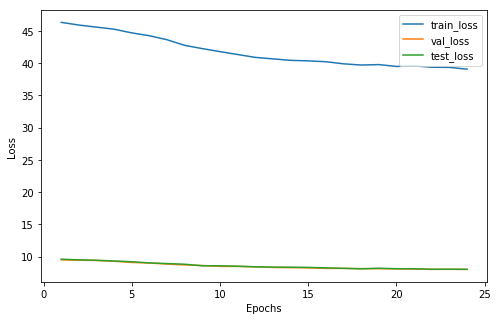

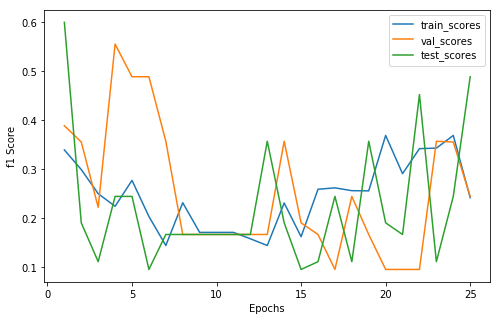

xxxxxxxxxxxxxx epoch: 25 xxxxxxxxxxxxxx
val_loss:  8.023310661315918
test_loss:  7.992711424827576
train_loss:  39.244919300079346
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       15      5       3
 1       14      1       3
 2        0      0       0


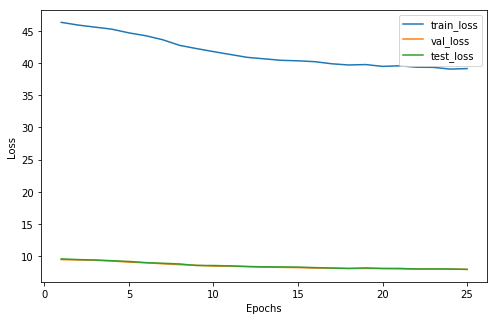

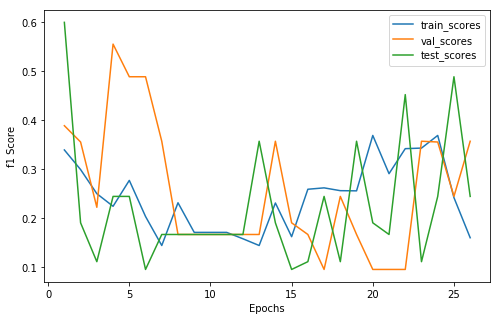

xxxxxxxxxxxxxx epoch: 26 xxxxxxxxxxxxxx
val_loss:  7.98219895362854
test_loss:  8.022222757339478
train_loss:  39.11679410934448
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       17      3       2
 1       12      3       4
 2        0      0       0


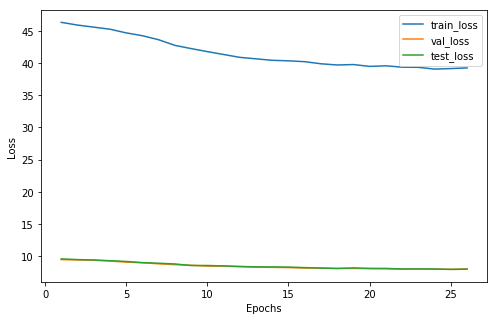

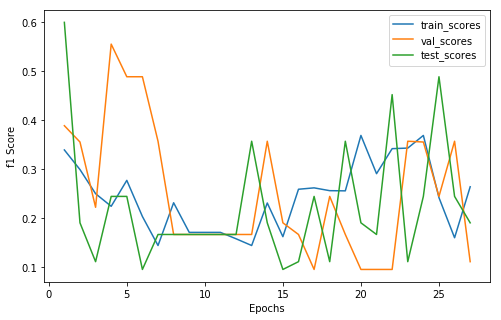

xxxxxxxxxxxxxx epoch: 27 xxxxxxxxxxxxxx
val_loss:  7.97083854675293
test_loss:  7.995584607124329
train_loss:  38.914777755737305
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       18      4       3
 1       11      2       3
 2        0      0       0


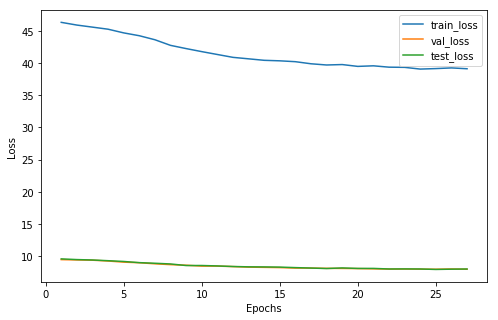

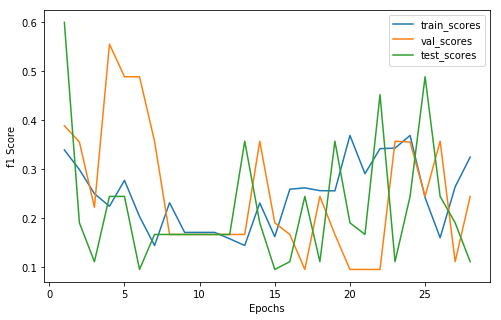

xxxxxxxxxxxxxx epoch: 28 xxxxxxxxxxxxxx
val_loss:  7.969968318939209
test_loss:  8.031210660934448
train_loss:  39.030846118927
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       18      4       5
 1       11      2       1
 2        0      0       0


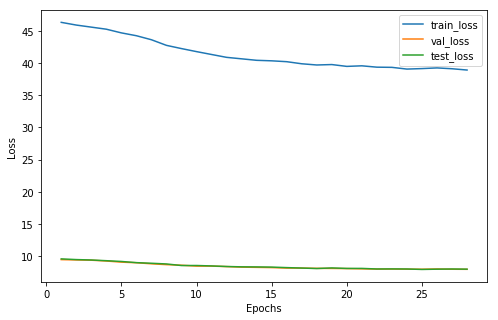

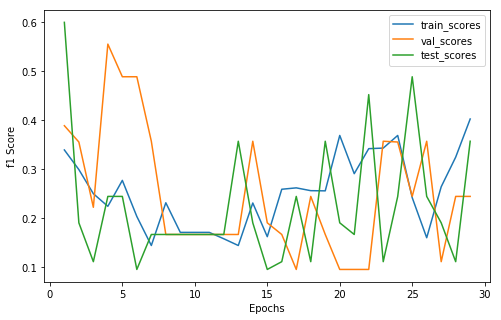

xxxxxxxxxxxxxx epoch: 29 xxxxxxxxxxxxxx
val_loss:  7.960734486579895
test_loss:  8.06686007976532
train_loss:  38.902851700782776
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      5       4
 1       17      1       2
 2        0      0       0


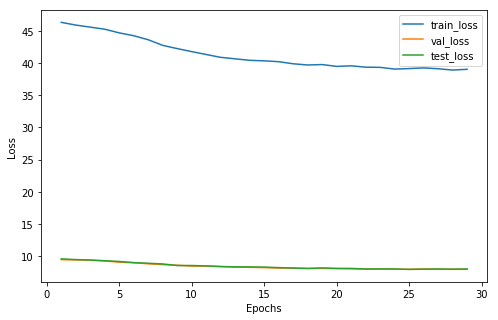

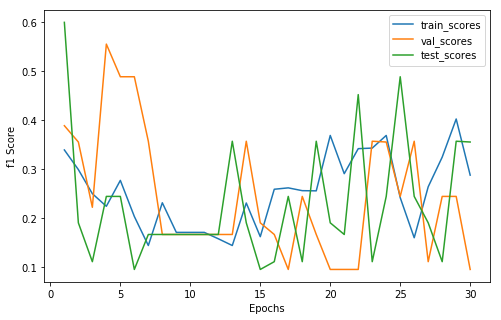

xxxxxxxxxxxxxx epoch: 30 xxxxxxxxxxxxxx
val_loss:  7.9135435819625854
test_loss:  7.939777970314026
train_loss:  38.8084682226181
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       11      2       3
 1       18      4       3
 2        0      0       0


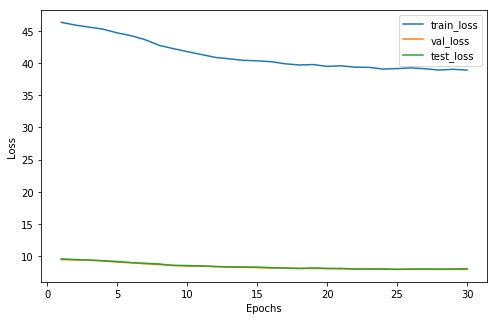

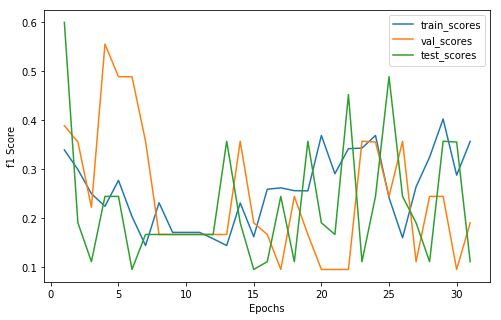

xxxxxxxxxxxxxx epoch: 31 xxxxxxxxxxxxxx
val_loss:  7.956595540046692
test_loss:  7.960345149040222
train_loss:  38.8890266418457
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       14      3       2
 1       15      3       4
 2        0      0       0


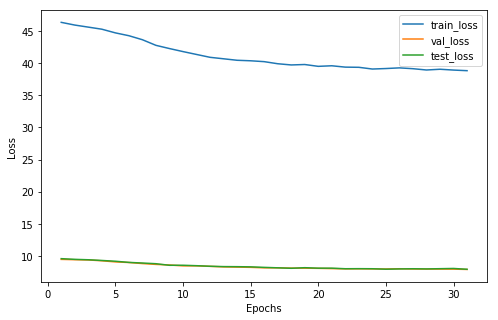

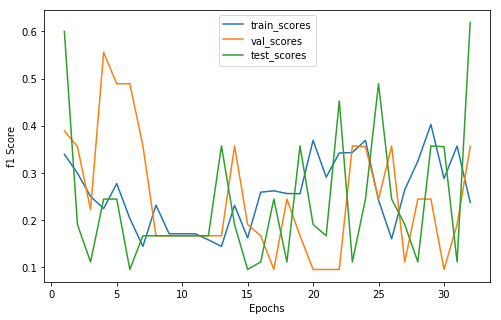

xxxxxxxxxxxxxx epoch: 32 xxxxxxxxxxxxxx
val_loss:  7.870111346244812
test_loss:  7.950453162193298
train_loss:  38.74689078330994
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       15      4       1
 1       14      2       5
 2        0      0       0


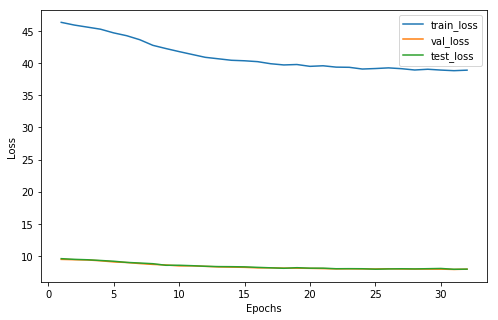

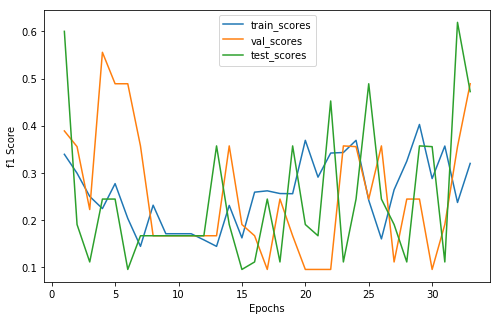

xxxxxxxxxxxxxx epoch: 33 xxxxxxxxxxxxxx
val_loss:  7.972916960716248
test_loss:  7.930615544319153
train_loss:  38.77399659156799
train_preds:  [tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0        9      4       2
 1       20      2       4
 2        0      0       0


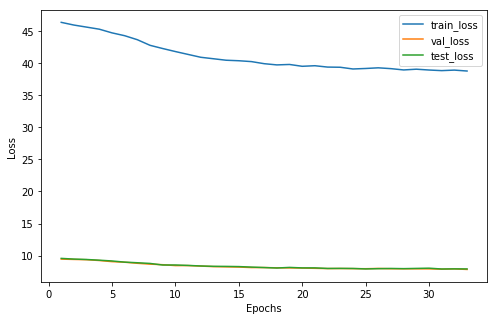

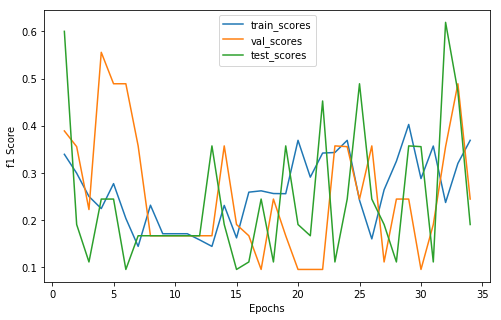

xxxxxxxxxxxxxx epoch: 34 xxxxxxxxxxxxxx
val_loss:  7.937867045402527
test_loss:  7.94905149936676
train_loss:  38.73288655281067
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       11      4       2
 1       18      2       4
 2        0      0       0


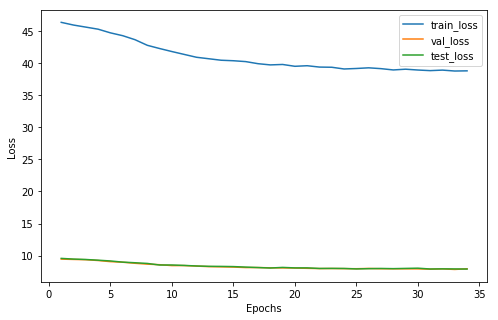

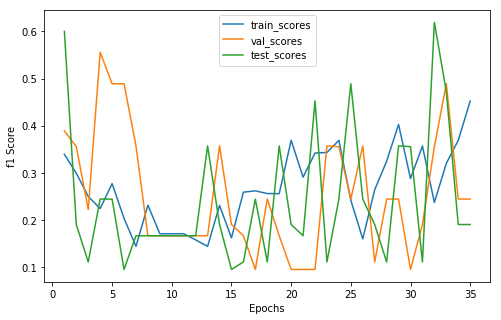

xxxxxxxxxxxxxx epoch: 35 xxxxxxxxxxxxxx
val_loss:  7.936691403388977
test_loss:  7.896236300468445
train_loss:  38.66957354545593
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       15      2       1
 1       14      4       5
 2        0      0       0


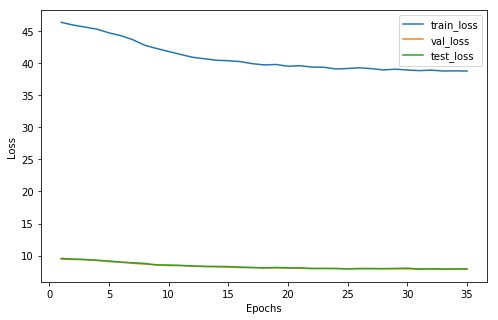

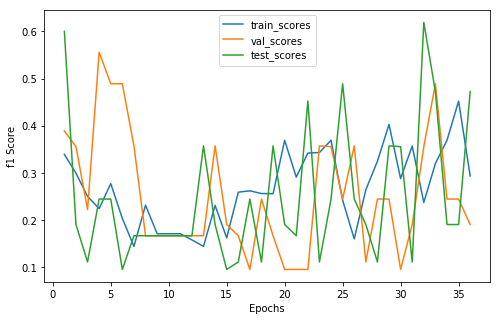

xxxxxxxxxxxxxx epoch: 36 xxxxxxxxxxxxxx
val_loss:  7.893992304801941
test_loss:  7.928722143173218
train_loss:  38.582579374313354
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       11      3       3
 1       18      3       3
 2        0      0       0


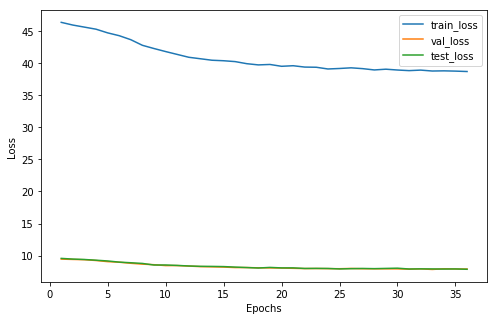

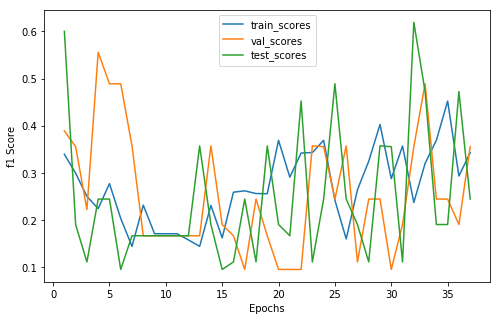

xxxxxxxxxxxxxx epoch: 37 xxxxxxxxxxxxxx
val_loss:  7.922651290893555
test_loss:  7.9442384243011475
train_loss:  38.61982786655426
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      3       2
 1       17      3       4
 2        0      0       0


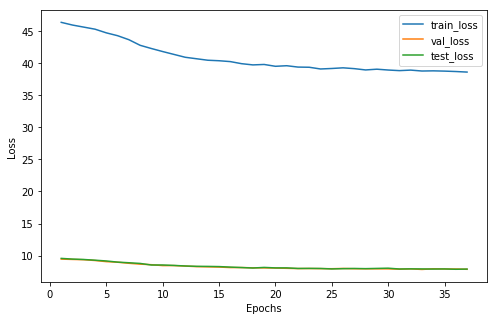

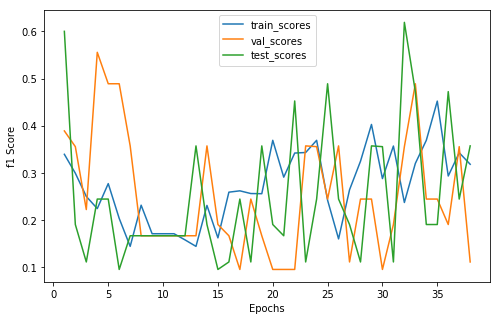

xxxxxxxxxxxxxx epoch: 38 xxxxxxxxxxxxxx
val_loss:  7.930165410041809
test_loss:  7.899201273918152
train_loss:  38.63311696052551
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        9      3       2
 1       20      3       4
 2        0      0       0


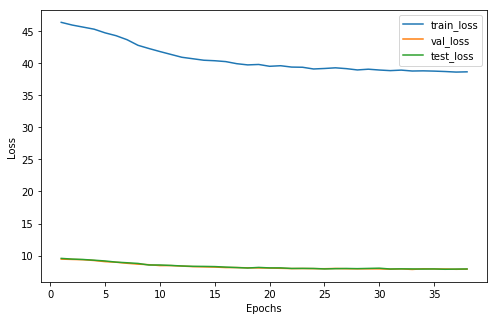

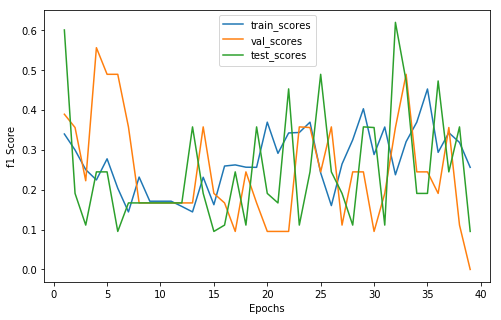

xxxxxxxxxxxxxx epoch: 39 xxxxxxxxxxxxxx
val_loss:  7.909430623054504
test_loss:  7.93195903301239
train_loss:  38.590139627456665
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0)]
      Train    Val    Test
--  -------  -----  ------
 0       12      4       2
 1       17      2       4
 2        0      0       0


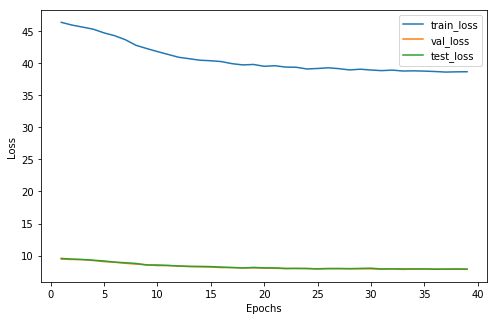

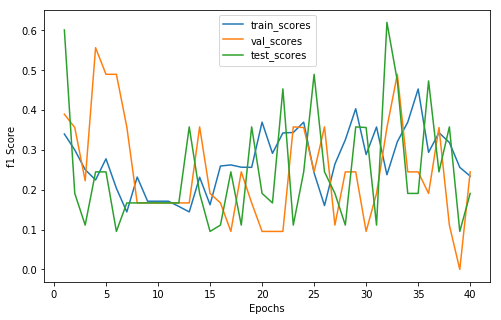

xxxxxxxxxxxxxx epoch: 40 xxxxxxxxxxxxxx
val_loss:  7.918599009513855
test_loss:  7.918999671936035
train_loss:  38.62290692329407
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      3       3
 1       17      3       3
 2        0      0       0


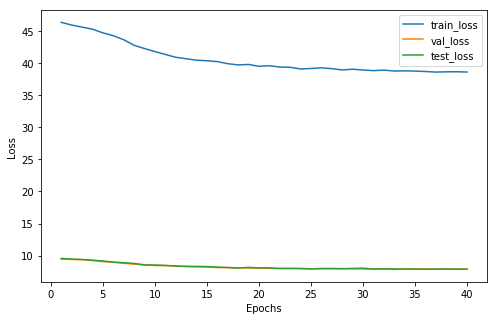

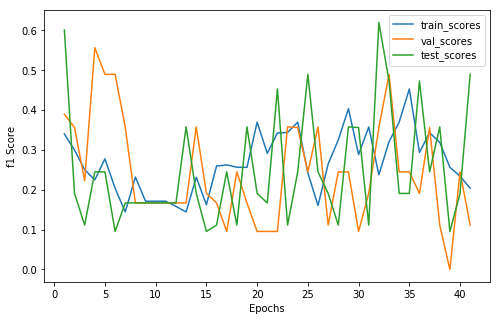

xxxxxxxxxxxxxx epoch: 41 xxxxxxxxxxxxxx
val_loss:  7.913920044898987
test_loss:  7.95196533203125
train_loss:  38.61065852642059
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      2       3
 1       23      4       3
 2        0      0       0


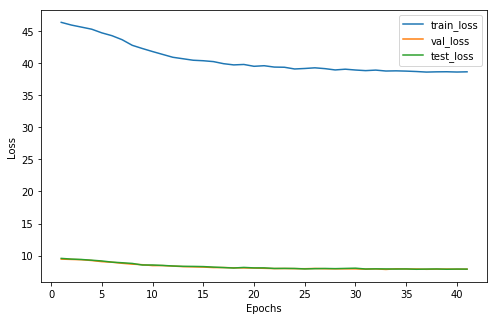

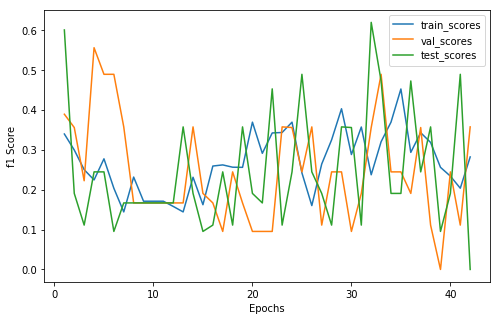

xxxxxxxxxxxxxx epoch: 42 xxxxxxxxxxxxxx
val_loss:  7.920886754989624
test_loss:  7.9239219427108765
train_loss:  38.44893491268158
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      1       0
 1       22      5       6
 2        0      0       0


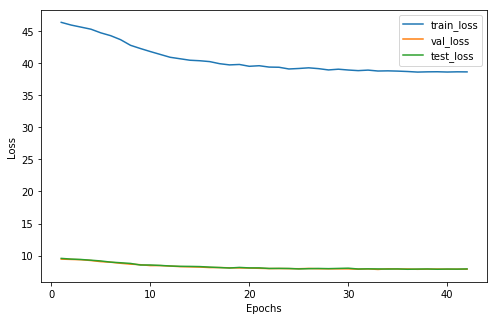

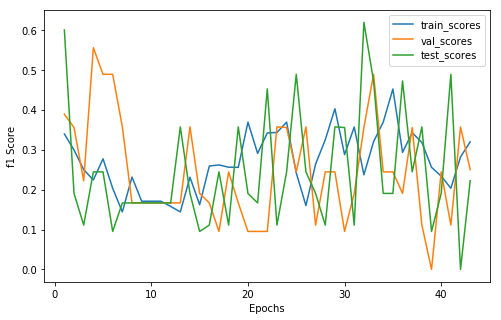

xxxxxxxxxxxxxx epoch: 43 xxxxxxxxxxxxxx
val_loss:  7.858217000961304
test_loss:  7.920739412307739
train_loss:  38.44127297401428
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       10      1       2
 1       19      5       4
 2        0      0       0


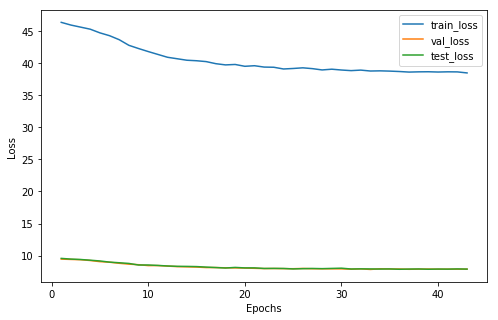

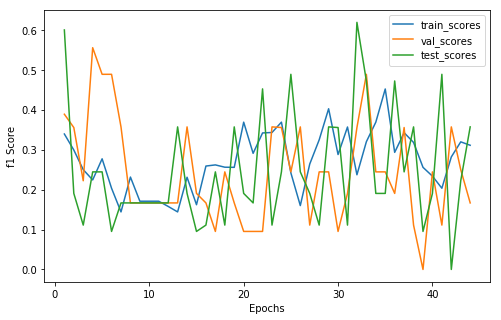

xxxxxxxxxxxxxx epoch: 44 xxxxxxxxxxxxxx
val_loss:  7.892729878425598
test_loss:  7.899696707725525
train_loss:  38.51922905445099
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       11      3       2
 1       18      3       4
 2        0      0       0


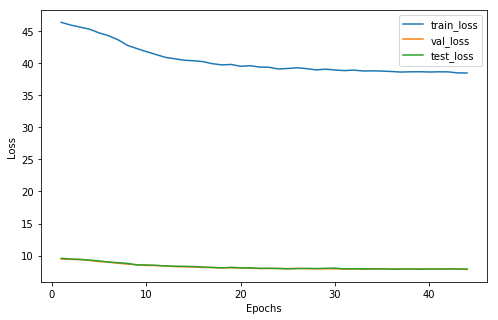

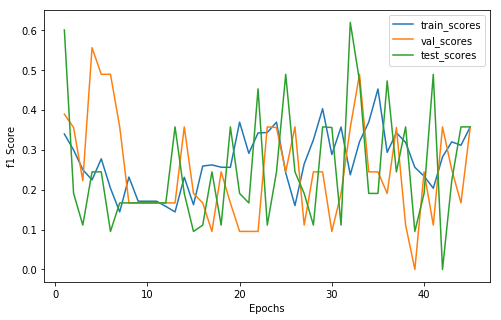

xxxxxxxxxxxxxx epoch: 45 xxxxxxxxxxxxxx
val_loss:  7.893870234489441
test_loss:  7.874392747879028
train_loss:  38.56311571598053
train_preds:  [tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      4       0
 1       21      2       6
 2        0      0       0


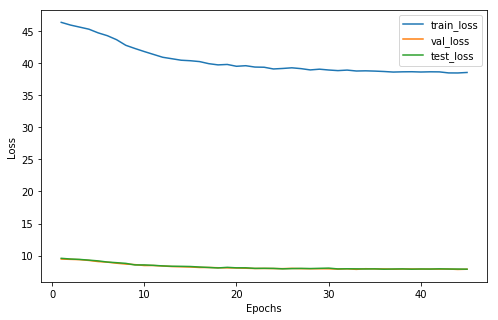

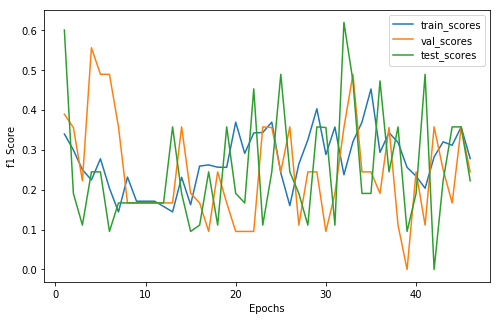

xxxxxxxxxxxxxx epoch: 46 xxxxxxxxxxxxxx
val_loss:  7.860845685005188
test_loss:  7.926420211791992
train_loss:  38.552136182785034
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      2       1
 1       22      4       5
 2        0      0       0


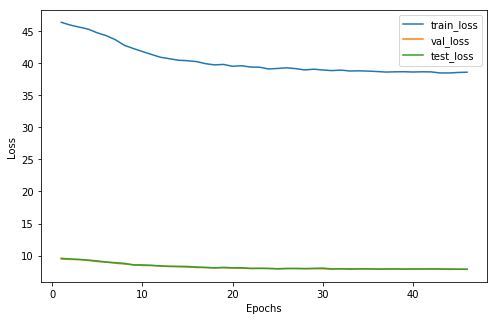

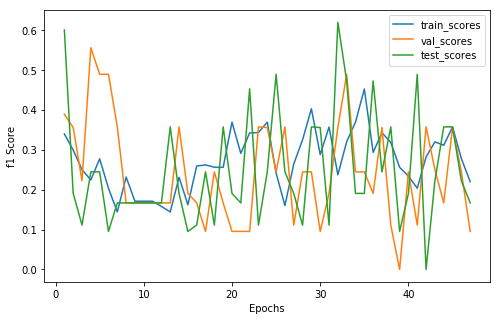

xxxxxxxxxxxxxx epoch: 47 xxxxxxxxxxxxxx
val_loss:  7.9062522649765015
test_loss:  7.9025620222091675
train_loss:  38.36280918121338
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      3       1
 1       22      3       5
 2        0      0       0


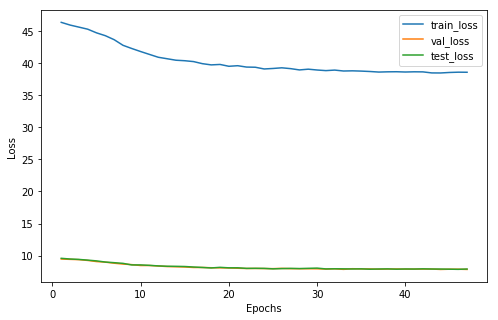

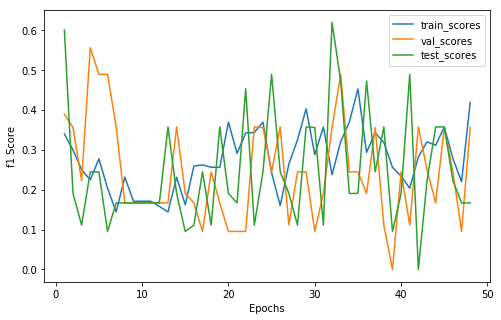

xxxxxxxxxxxxxx epoch: 48 xxxxxxxxxxxxxx
val_loss:  7.916154146194458
test_loss:  7.867711544036865
train_loss:  38.330665588378906
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        5      1       0
 1       24      5       6
 2        0      0       0


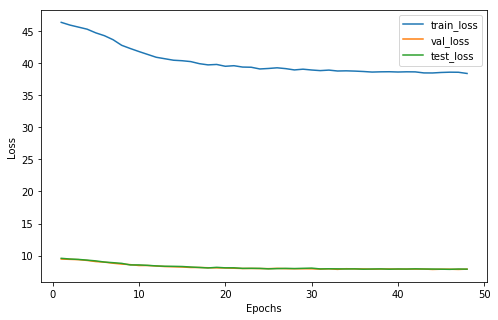

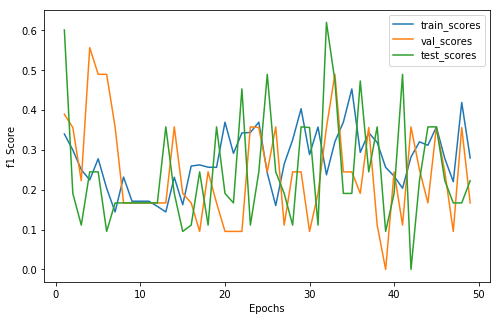

xxxxxxxxxxxxxx epoch: 49 xxxxxxxxxxxxxx
val_loss:  7.905248045921326
test_loss:  7.892245411872864
train_loss:  38.48928689956665
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        3      2       2
 1       26      4       4
 2        0      0       0


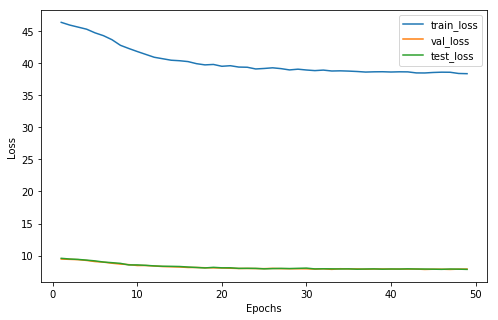

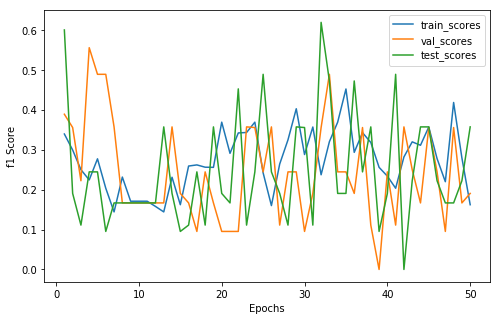

xxxxxxxxxxxxxx epoch: 50 xxxxxxxxxxxxxx
val_loss:  7.916885852813721
test_loss:  7.907864451408386
train_loss:  38.40358483791351
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      2       0
 1       22      4       6
 2        0      0       0


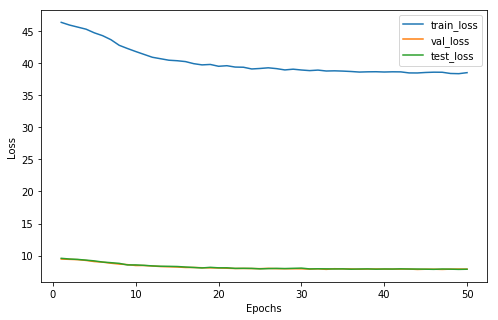

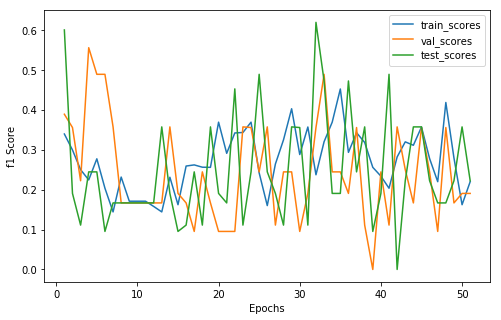

xxxxxxxxxxxxxx epoch: 51 xxxxxxxxxxxxxx
val_loss:  7.870516300201416
test_loss:  7.891064167022705
train_loss:  38.36306703090668
train_preds:  [tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        2      1       0
 1       27      5       6
 2        0      0       0


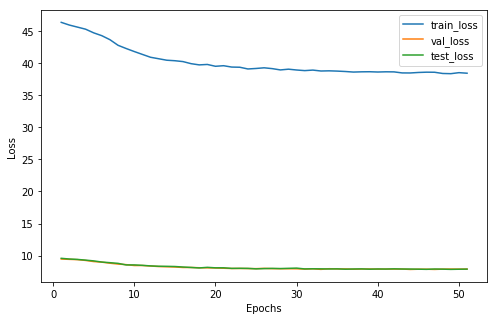

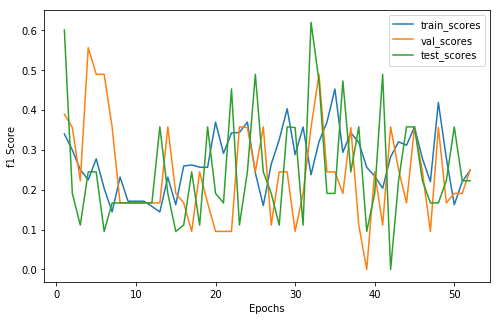

xxxxxxxxxxxxxx epoch: 52 xxxxxxxxxxxxxx
val_loss:  7.857838988304138
test_loss:  7.8811458349227905
train_loss:  38.40255331993103
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      1       0
 1       25      5       6
 2        0      0       0


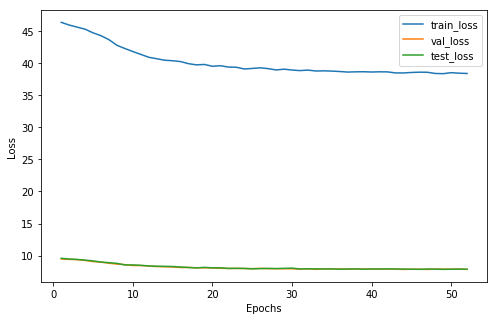

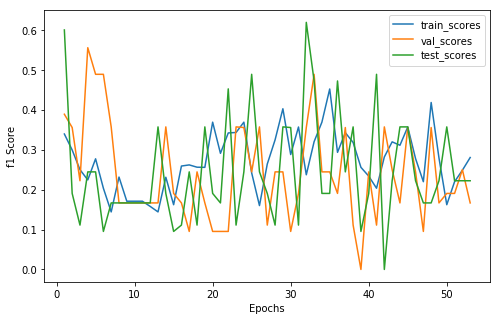

xxxxxxxxxxxxxx epoch: 53 xxxxxxxxxxxxxx
val_loss:  7.853482127189636
test_loss:  7.85837197303772
train_loss:  38.31497502326965
train_preds:  [tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        5      3       2
 1       24      3       4
 2        0      0       0


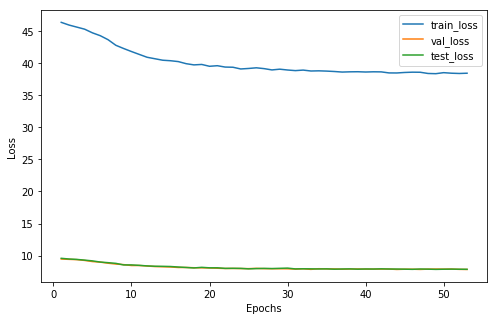

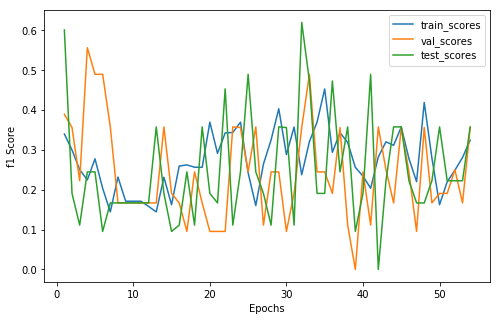

xxxxxxxxxxxxxx epoch: 54 xxxxxxxxxxxxxx
val_loss:  7.838028311729431
test_loss:  7.939616084098816
train_loss:  38.37554216384888
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        9      2       2
 1       20      4       4
 2        0      0       0


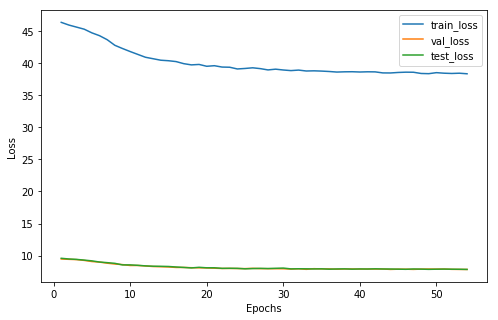

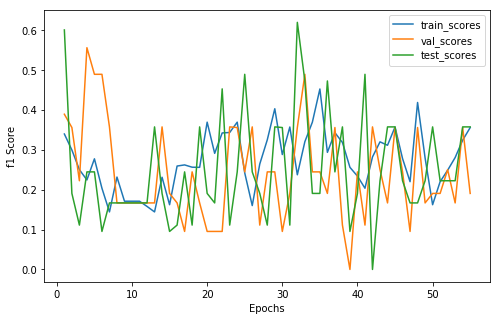

xxxxxxxxxxxxxx epoch: 55 xxxxxxxxxxxxxx
val_loss:  7.838054060935974
test_loss:  7.903244376182556
train_loss:  38.29410231113434
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      1       0
 1       21      5       6
 2        0      0       0


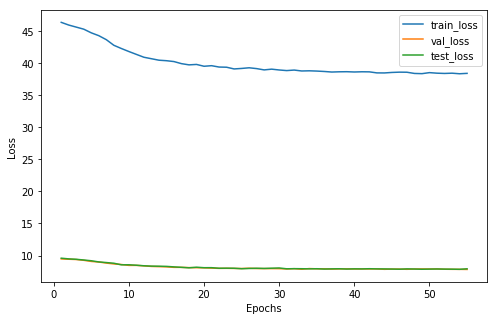

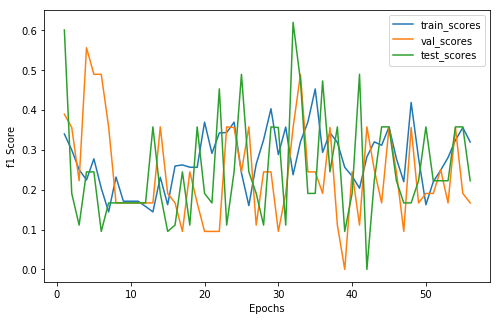

xxxxxxxxxxxxxx epoch: 56 xxxxxxxxxxxxxx
val_loss:  7.869181990623474
test_loss:  7.904614329338074
train_loss:  38.36934053897858
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        3      0       0
 1       26      6       6
 2        0      0       0


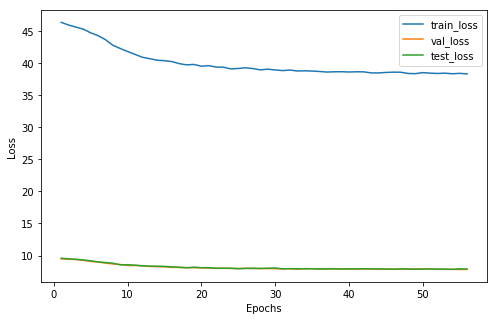

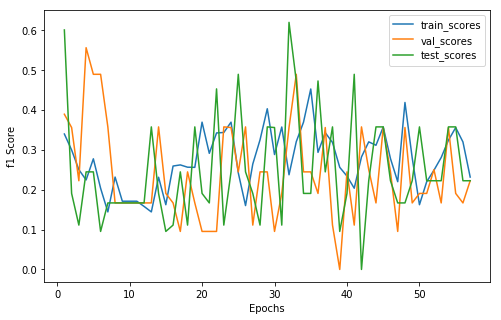

xxxxxxxxxxxxxx epoch: 57 xxxxxxxxxxxxxx
val_loss:  7.853776693344116
test_loss:  7.9015456438064575
train_loss:  38.303041219711304
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      1       0
 1       23      5       6
 2        0      0       0


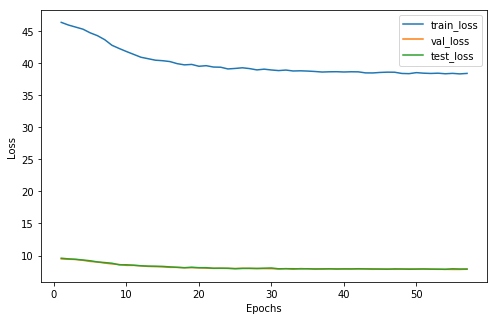

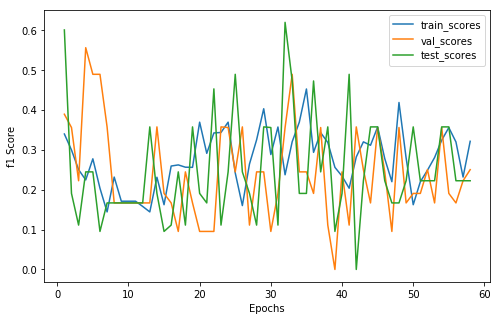

xxxxxxxxxxxxxx epoch: 58 xxxxxxxxxxxxxx
val_loss:  7.907242059707642
test_loss:  7.871051788330078
train_loss:  38.387468576431274
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      2       1
 1       25      4       5
 2        0      0       0


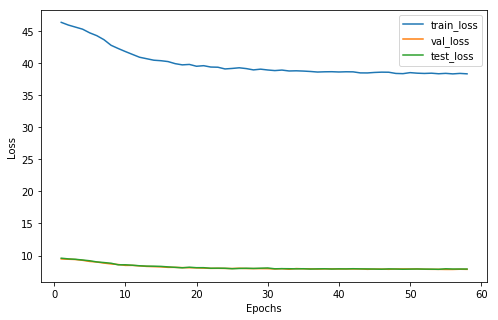

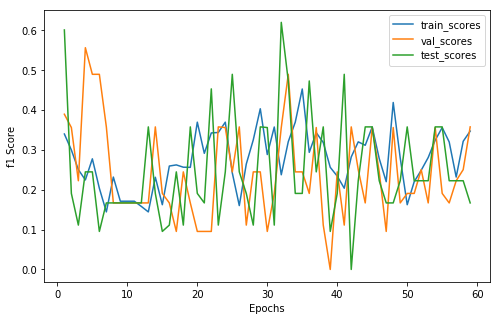

xxxxxxxxxxxxxx epoch: 59 xxxxxxxxxxxxxx
val_loss:  7.827598929405212
test_loss:  7.843578100204468
train_loss:  38.36736822128296
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        3      1       0
 1       26      5       6
 2        0      0       0


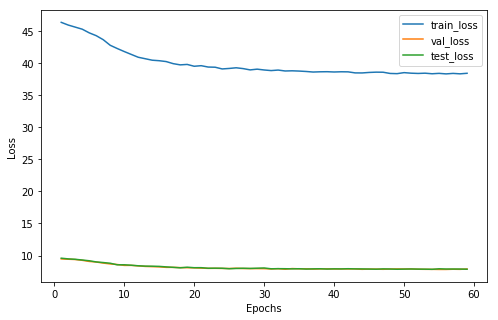

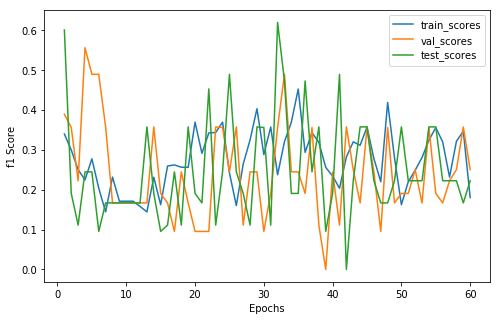

xxxxxxxxxxxxxx epoch: 60 xxxxxxxxxxxxxx
val_loss:  7.918882369995117
test_loss:  7.965509533882141
train_loss:  38.30668377876282
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      3       0
 1       21      3       6
 2        0      0       0


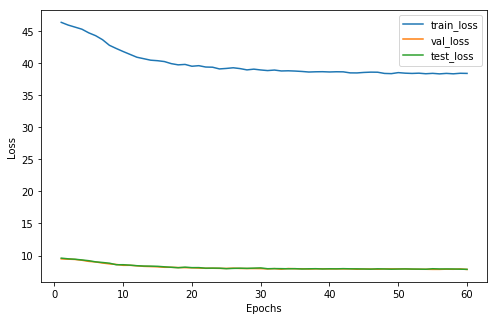

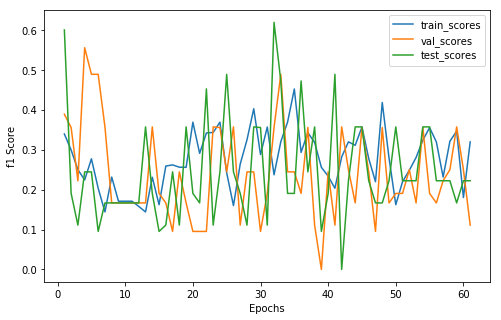

xxxxxxxxxxxxxx epoch: 61 xxxxxxxxxxxxxx
val_loss:  7.844630599021912
test_loss:  7.874330639839172
train_loss:  38.28916907310486
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      2       0
 1       25      4       6
 2        0      0       0


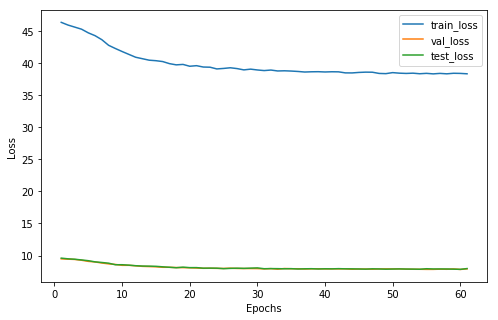

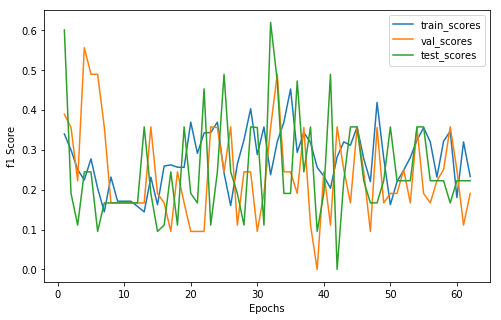

xxxxxxxxxxxxxx epoch: 62 xxxxxxxxxxxxxx
val_loss:  7.843644857406616
test_loss:  7.892161846160889
train_loss:  38.24951982498169
train_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        3      2       0
 1       26      4       6
 2        0      0       0


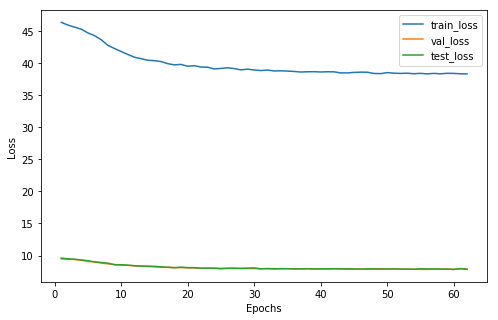

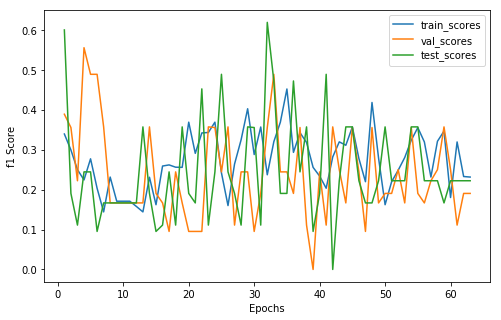

xxxxxxxxxxxxxx epoch: 63 xxxxxxxxxxxxxx
val_loss:  7.87332808971405
test_loss:  7.8944878578186035
train_loss:  38.337196350097656
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      2       1
 1       22      4       5
 2        0      0       0


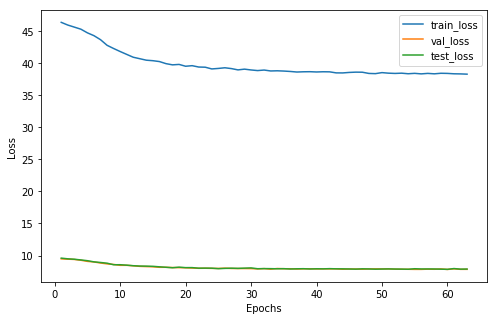

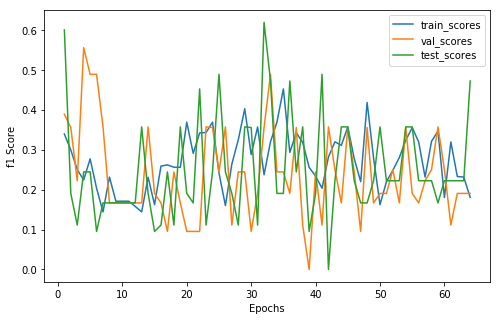

xxxxxxxxxxxxxx epoch: 64 xxxxxxxxxxxxxx
val_loss:  7.8276389837265015
test_loss:  7.898730158805847
train_loss:  38.28060603141785
train_preds:  [tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      1       0
 1       23      5       6
 2        0      0       0


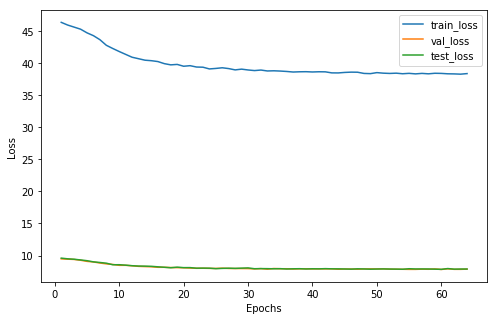

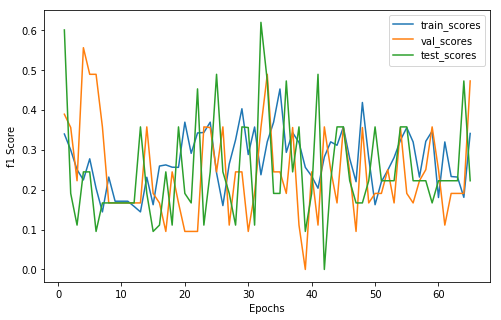

xxxxxxxxxxxxxx epoch: 65 xxxxxxxxxxxxxx
val_loss:  7.834365129470825
test_loss:  7.832860946655273
train_loss:  38.218170285224915
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      1       0
 1       25      5       6
 2        0      0       0


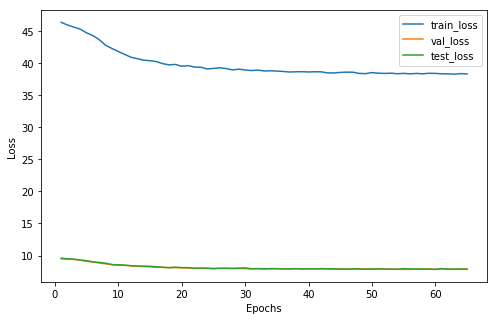

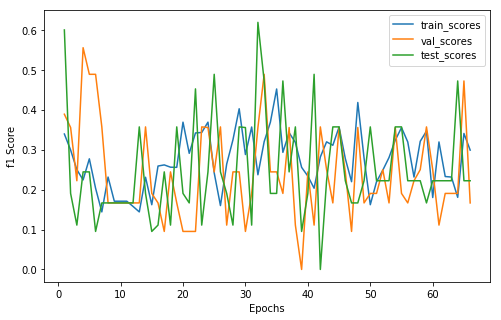

xxxxxxxxxxxxxx epoch: 66 xxxxxxxxxxxxxx
val_loss:  7.809095501899719
test_loss:  7.903194308280945
train_loss:  38.3411705493927
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        5      2       1
 1       24      4       5
 2        0      0       0


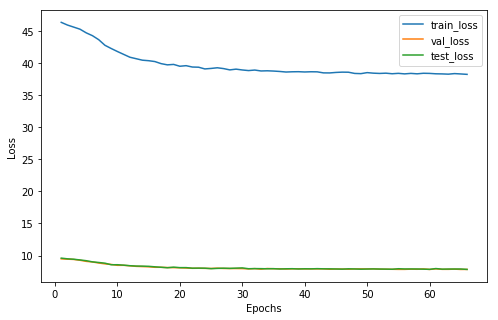

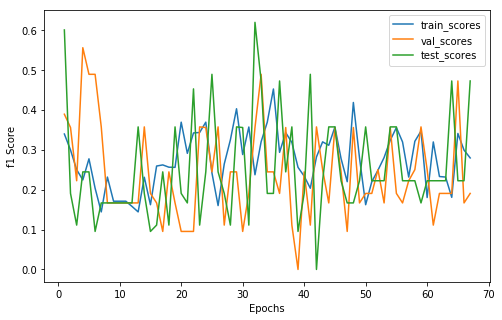

xxxxxxxxxxxxxx epoch: 67 xxxxxxxxxxxxxx
val_loss:  7.858909010887146
test_loss:  7.847549796104431
train_loss:  38.22253704071045
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      3       0
 1       21      3       6
 2        0      0       0


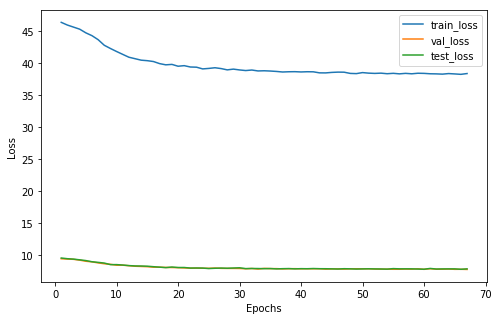

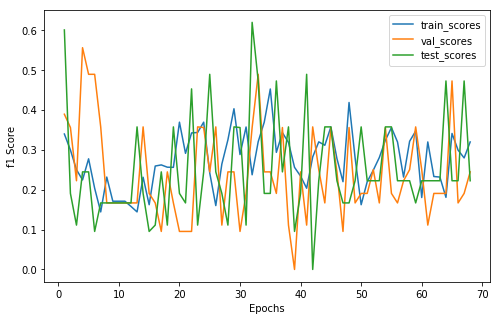

xxxxxxxxxxxxxx epoch: 68 xxxxxxxxxxxxxx
val_loss:  7.839787006378174
test_loss:  8.011785984039307
train_loss:  38.151162981987
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        5      1       0
 1       24      5       6
 2        0      0       0


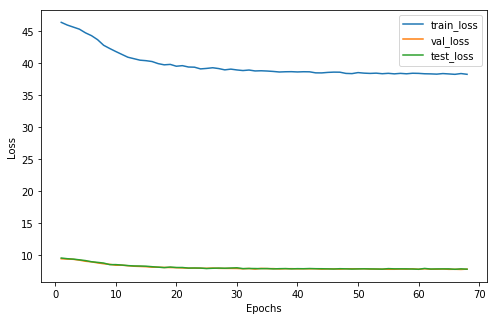

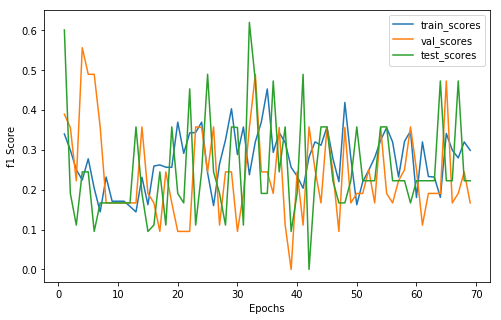

xxxxxxxxxxxxxx epoch: 69 xxxxxxxxxxxxxx
val_loss:  7.875017285346985
test_loss:  7.90207576751709
train_loss:  38.23399519920349
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      1       0
 1       23      5       6
 2        0      0       0


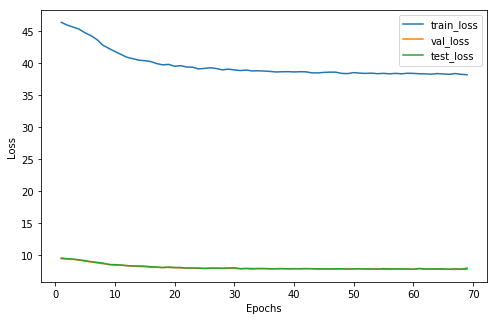

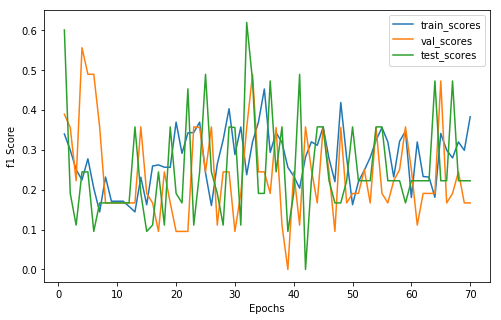

xxxxxxxxxxxxxx epoch: 70 xxxxxxxxxxxxxx
val_loss:  7.819911360740662
test_loss:  7.892464280128479
train_loss:  38.20811986923218
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      1       0
 1       23      5       6
 2        0      0       0


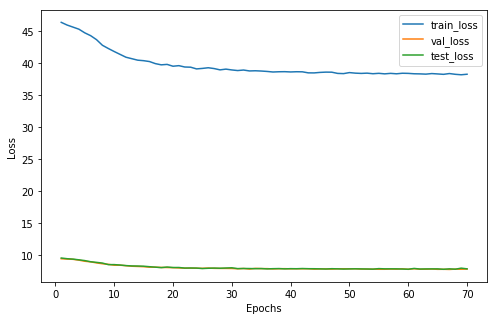

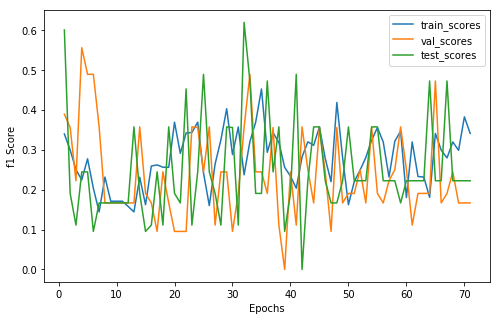

xxxxxxxxxxxxxx epoch: 71 xxxxxxxxxxxxxx
val_loss:  7.843717575073242
test_loss:  7.936630964279175
train_loss:  38.14689242839813
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        2      1       0
 1       27      5       6
 2        0      0       0


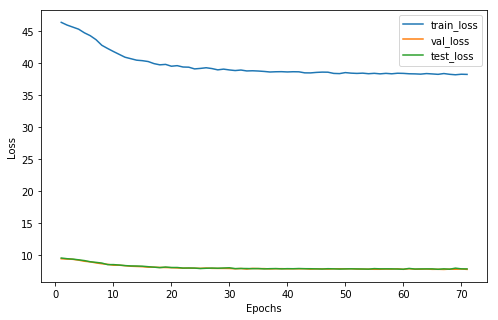

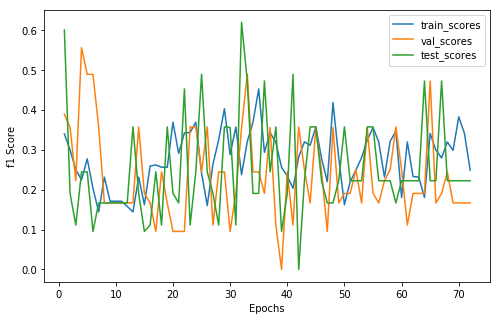

xxxxxxxxxxxxxx epoch: 72 xxxxxxxxxxxxxx
val_loss:  7.809217810630798
test_loss:  7.848378300666809
train_loss:  38.128653168678284
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      3       0
 1       22      3       6
 2        0      0       0


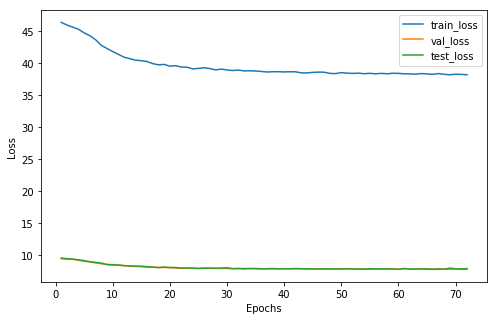

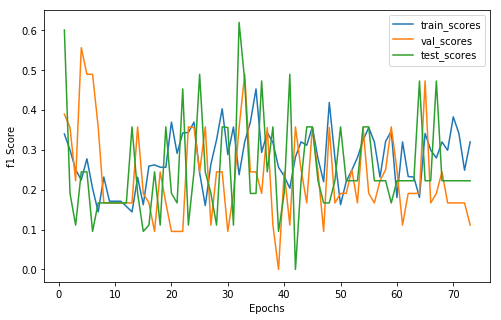

xxxxxxxxxxxxxx epoch: 73 xxxxxxxxxxxxxx
val_loss:  7.813616514205933
test_loss:  7.918114900588989
train_loss:  38.154439091682434
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      2       1
 1       21      4       5
 2        0      0       0


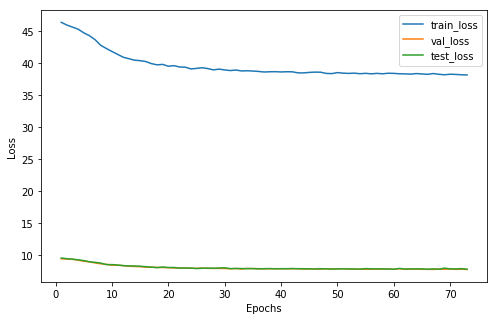

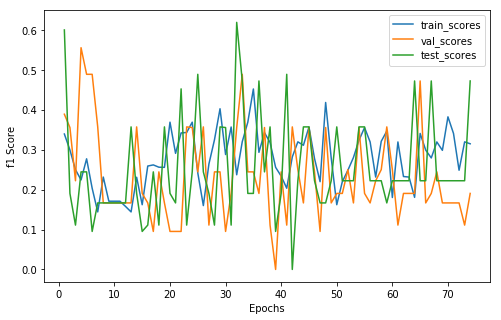

xxxxxxxxxxxxxx epoch: 74 xxxxxxxxxxxxxx
val_loss:  7.849036693572998
test_loss:  7.855957627296448
train_loss:  38.217360854148865
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      1       0
 1       25      5       6
 2        0      0       0


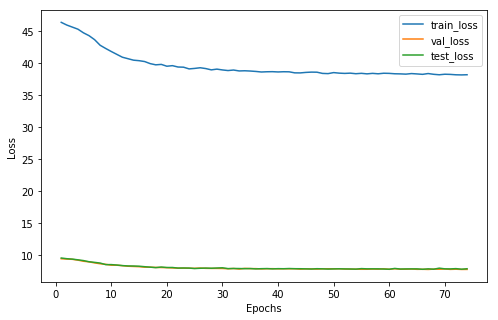

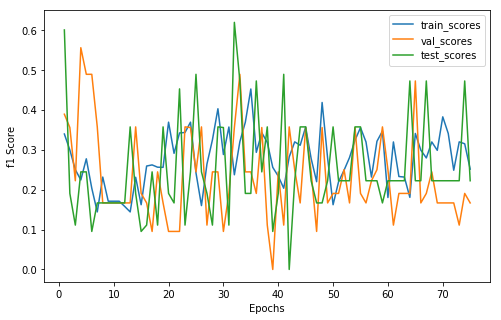

xxxxxxxxxxxxxx epoch: 75 xxxxxxxxxxxxxx
val_loss:  7.7885342836380005
test_loss:  7.871193289756775
train_loss:  38.1980801820755
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      3       1
 1       23      3       5
 2        0      0       0


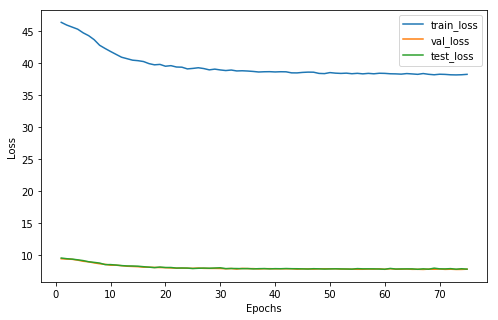

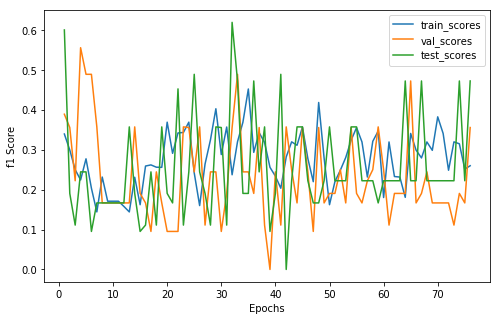

xxxxxxxxxxxxxx epoch: 76 xxxxxxxxxxxxxx
val_loss:  7.814141154289246
test_loss:  7.902452111244202
train_loss:  38.151206254959106
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        2      2       1
 1       27      4       5
 2        0      0       0


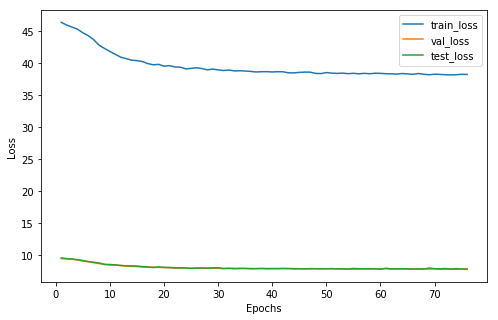

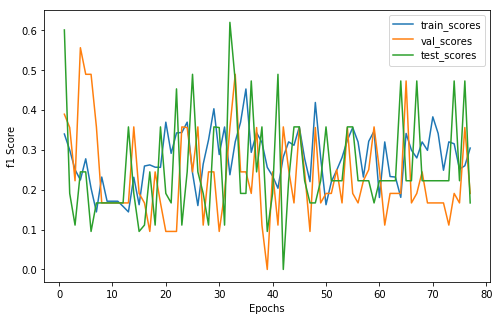

xxxxxxxxxxxxxx epoch: 77 xxxxxxxxxxxxxx
val_loss:  7.775372505187988
test_loss:  7.8969398736953735
train_loss:  38.11981654167175
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      2       0
 1       25      4       6
 2        0      0       0


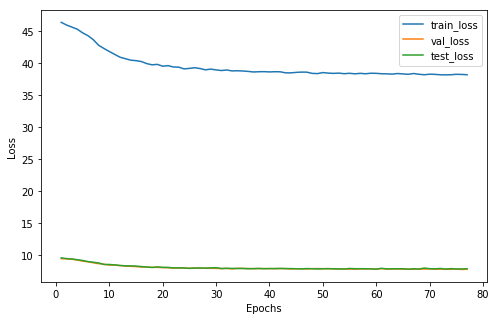

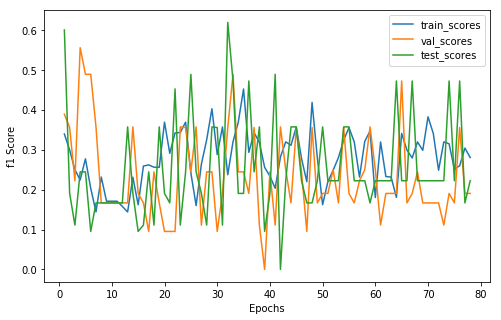

xxxxxxxxxxxxxx epoch: 78 xxxxxxxxxxxxxx
val_loss:  7.784688353538513
test_loss:  7.8969502449035645
train_loss:  38.27397060394287
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      3       0
 1       25      3       6
 2        0      0       0


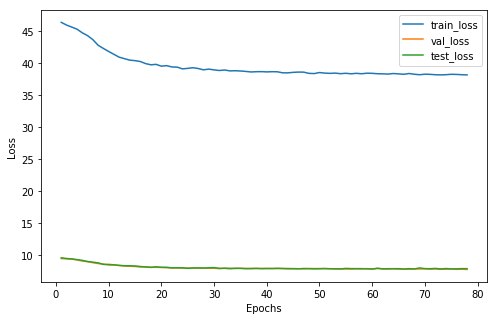

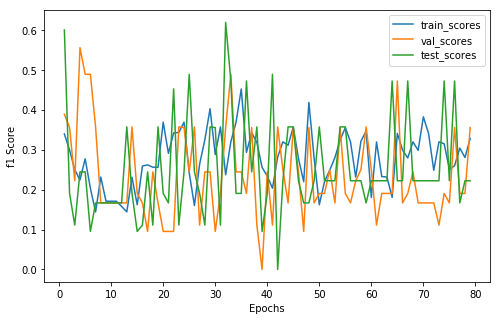

xxxxxxxxxxxxxx epoch: 79 xxxxxxxxxxxxxx
val_loss:  7.756823778152466
test_loss:  7.8329854011535645
train_loss:  38.084771156311035
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      2       1
 1       23      4       5
 2        0      0       0


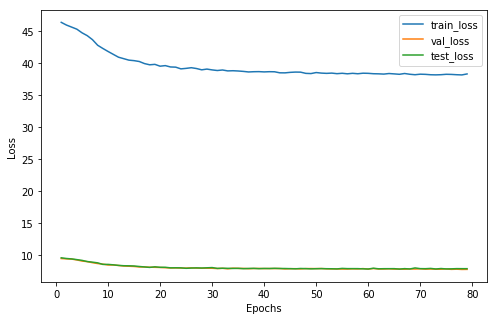

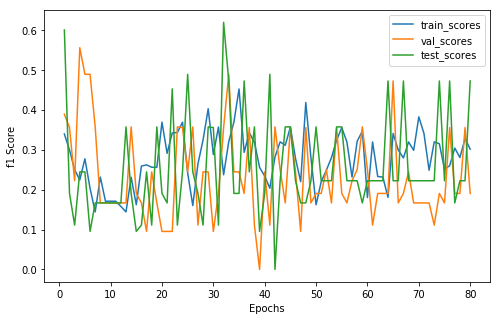

xxxxxxxxxxxxxx epoch: 80 xxxxxxxxxxxxxx
val_loss:  7.822277188301086
test_loss:  7.946070551872253
train_loss:  38.0882111787796
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      1       0
 1       25      5       6
 2        0      0       0


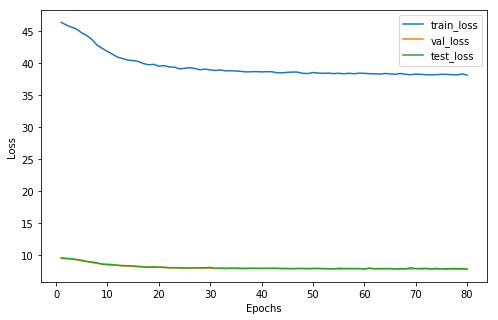

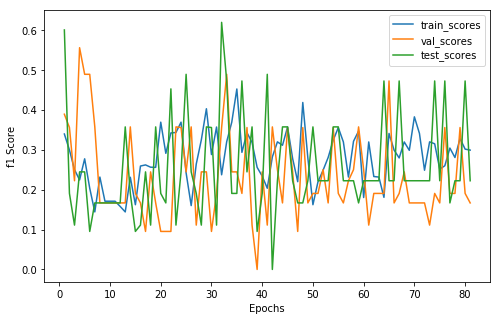

xxxxxxxxxxxxxx epoch: 81 xxxxxxxxxxxxxx
val_loss:  7.789471626281738
test_loss:  7.886351108551025
train_loss:  38.001842737197876
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      3       2
 1       22      3       4
 2        0      0       0


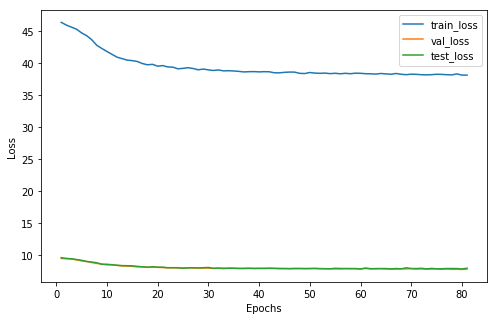

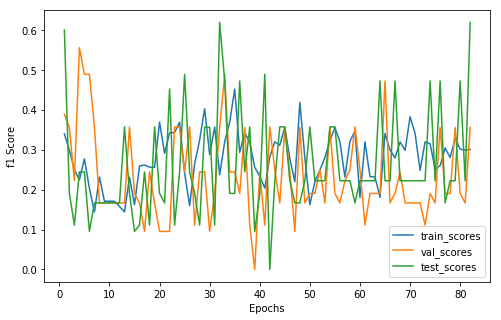

xxxxxxxxxxxxxx epoch: 82 xxxxxxxxxxxxxx
val_loss:  7.788864493370056
test_loss:  7.91439688205719
train_loss:  37.97956454753876
train_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      2       2
 1       21      4       4
 2        0      0       0


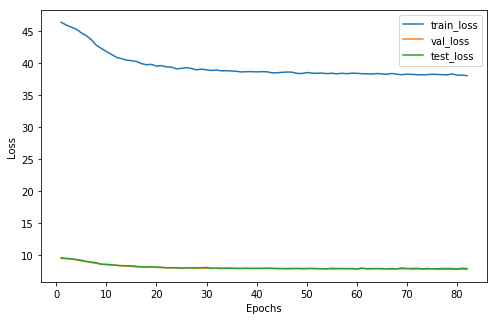

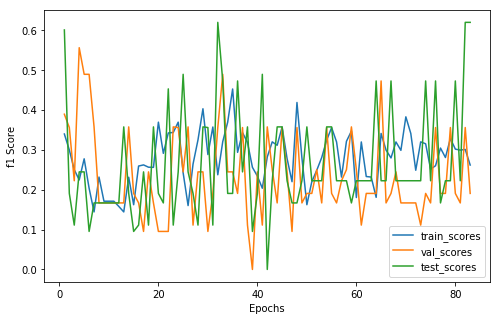

xxxxxxxxxxxxxx epoch: 83 xxxxxxxxxxxxxx
val_loss:  7.770403265953064
test_loss:  7.883525609970093
train_loss:  37.969396233558655
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      3       0
 1       23      3       6
 2        0      0       0


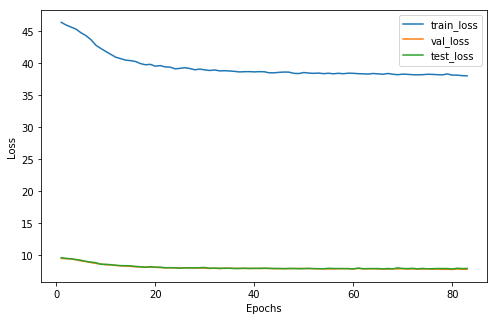

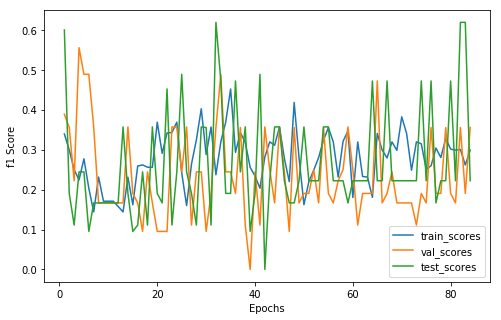

xxxxxxxxxxxxxx epoch: 84 xxxxxxxxxxxxxx
val_loss:  7.793441414833069
test_loss:  7.7978692054748535
train_loss:  37.99313306808472
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      3       0
 1       23      3       6
 2        0      0       0


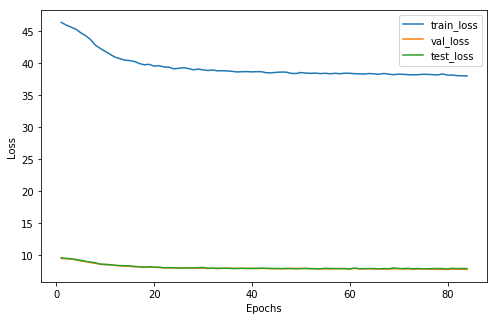

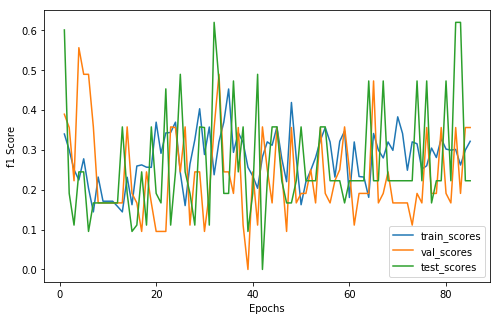

xxxxxxxxxxxxxx epoch: 85 xxxxxxxxxxxxxx
val_loss:  7.773069739341736
test_loss:  7.895682096481323
train_loss:  38.06064295768738
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      2       1
 1       21      4       5
 2        0      0       0


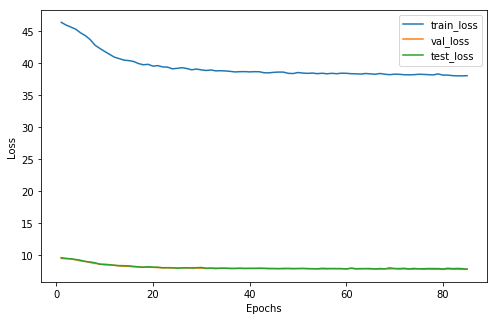

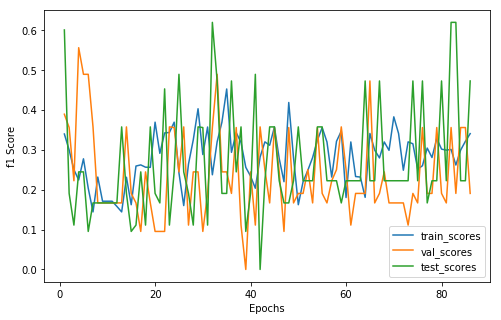

xxxxxxxxxxxxxx epoch: 86 xxxxxxxxxxxxxx
val_loss:  7.782585263252258
test_loss:  7.902872085571289
train_loss:  38.028695940971375
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        6      3       0
 1       23      3       6
 2        0      0       0


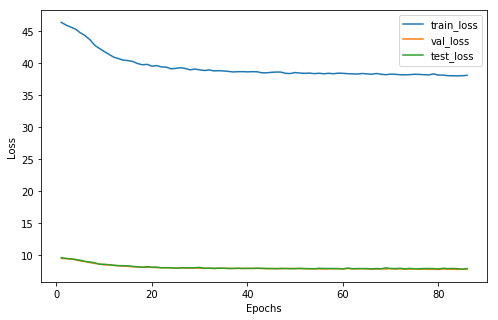

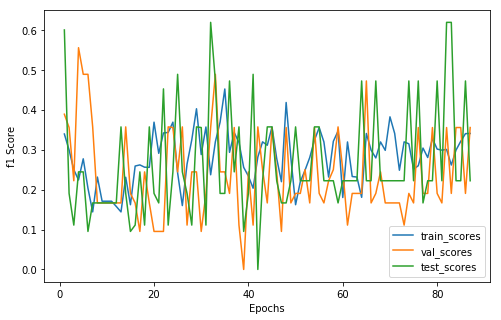

xxxxxxxxxxxxxx epoch: 87 xxxxxxxxxxxxxx
val_loss:  7.729889988899231
test_loss:  7.803837060928345
train_loss:  38.044344544410706
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      3       2
 1       22      3       4
 2        0      0       0


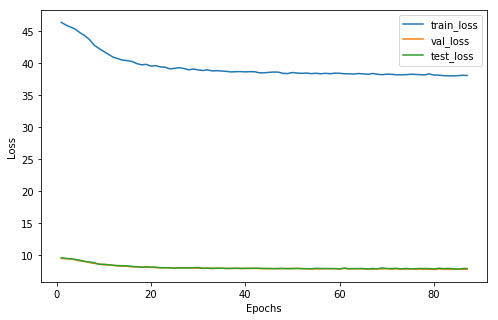

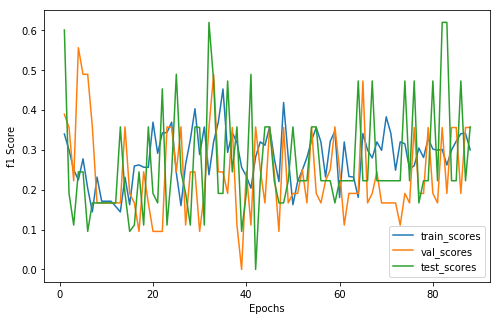

xxxxxxxxxxxxxx epoch: 88 xxxxxxxxxxxxxx
val_loss:  7.72090744972229
test_loss:  7.88189435005188
train_loss:  37.98339509963989
train_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      1       0
 1       22      5       6
 2        0      0       0


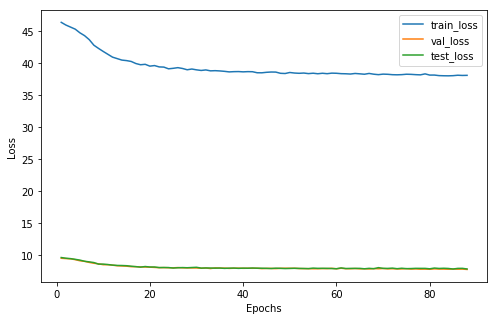

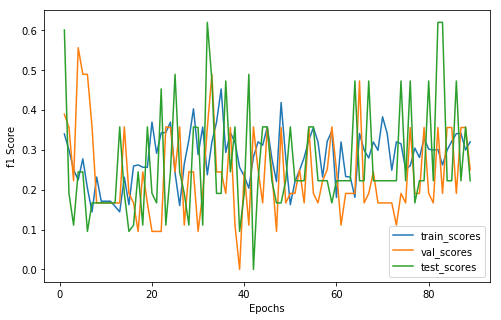

xxxxxxxxxxxxxx epoch: 89 xxxxxxxxxxxxxx
val_loss:  7.698362231254578
test_loss:  7.8361064195632935
train_loss:  37.98119056224823
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      3       1
 1       22      3       5
 2        0      0       0


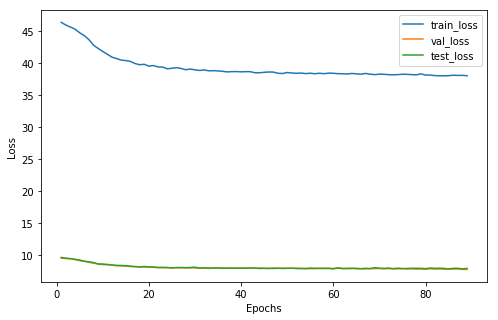

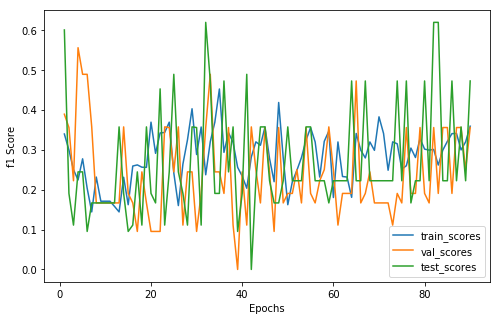

xxxxxxxxxxxxxx epoch: 90 xxxxxxxxxxxxxx
val_loss:  7.751546382904053
test_loss:  7.844552516937256
train_loss:  37.92218351364136
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        7      3       1
 1       22      3       5
 2        0      0       0


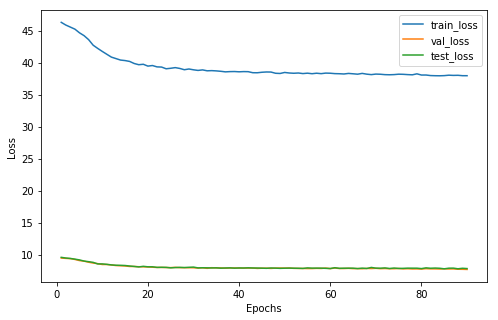

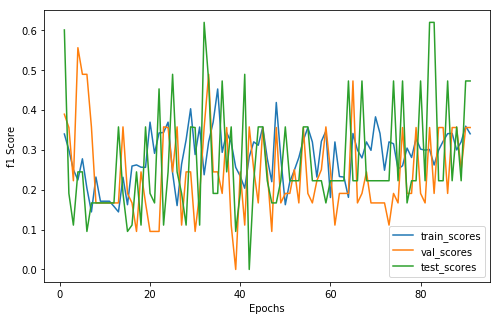

xxxxxxxxxxxxxx epoch: 91 xxxxxxxxxxxxxx
val_loss:  7.775907397270203
test_loss:  7.988661408424377
train_loss:  37.80396020412445
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        9      1       1
 1       20      5       5
 2        0      0       0


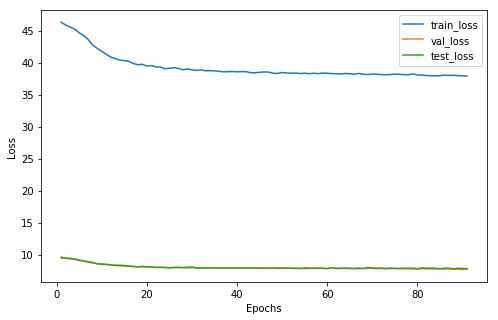

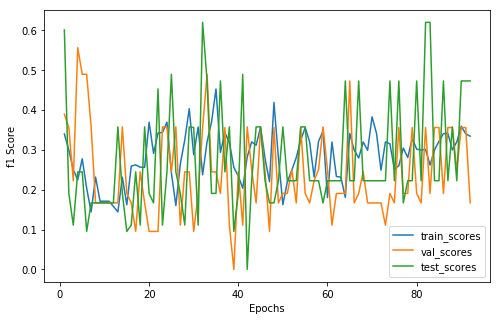

xxxxxxxxxxxxxx epoch: 92 xxxxxxxxxxxxxx
val_loss:  7.722057580947876
test_loss:  7.94113028049469
train_loss:  37.951351046562195
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        8      3       1
 1       21      3       5
 2        0      0       0


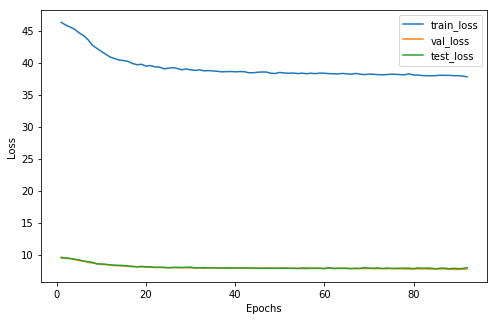

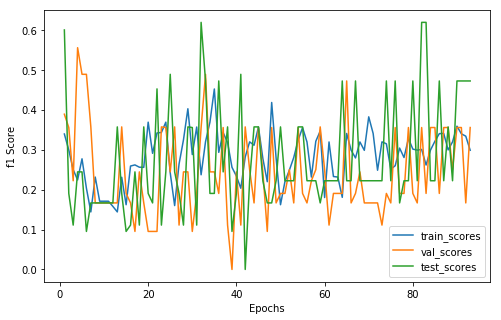

xxxxxxxxxxxxxx epoch: 93 xxxxxxxxxxxxxx
val_loss:  7.726877212524414
test_loss:  7.98316752910614
train_loss:  37.9337112903595
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       11      2       2
 1       18      4       4
 2        0      0       0


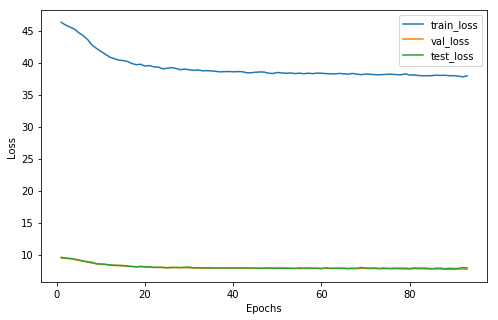

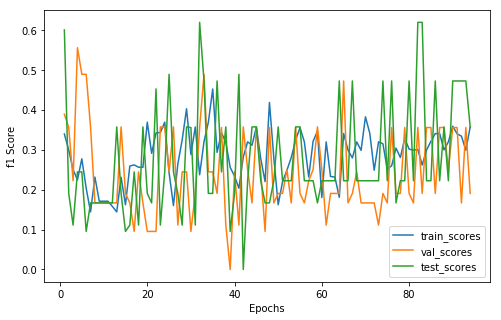

xxxxxxxxxxxxxx epoch: 94 xxxxxxxxxxxxxx
val_loss:  7.748079776763916
test_loss:  7.882267236709595
train_loss:  37.9225617647171
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        4      1       2
 1       25      5       4
 2        0      0       0


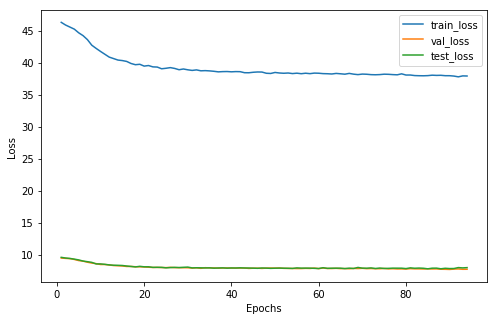

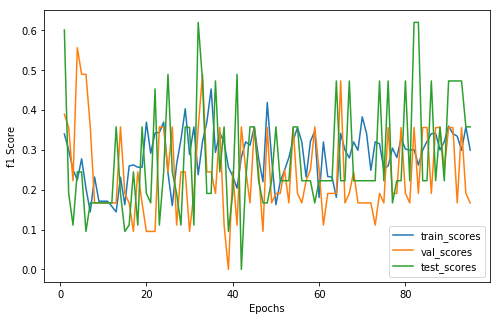

xxxxxxxxxxxxxx epoch: 95 xxxxxxxxxxxxxx
val_loss:  7.723456382751465
test_loss:  8.024649262428284
train_loss:  37.847858905792236
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        5      3       1
 1       24      3       5
 2        0      0       0


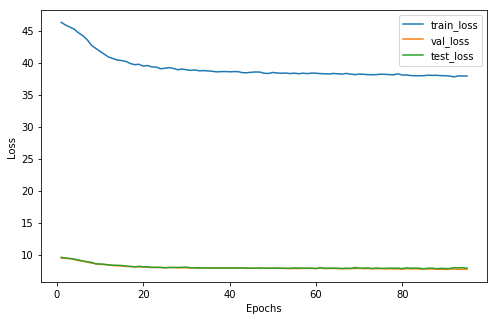

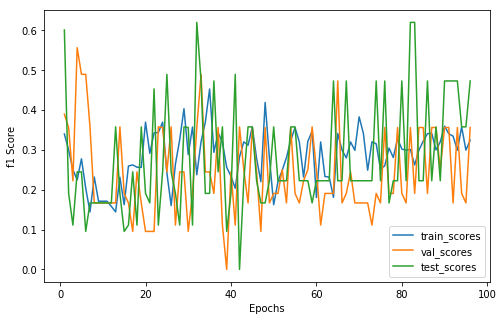

xxxxxxxxxxxxxx epoch: 96 xxxxxxxxxxxxxx
val_loss:  7.689667582511902
test_loss:  7.929510712623596
train_loss:  37.84004521369934
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       11      3       1
 1       18      3       5
 2        0      0       0


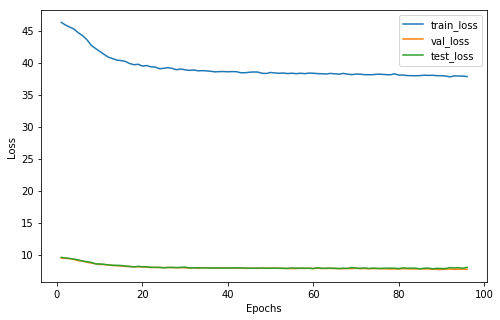

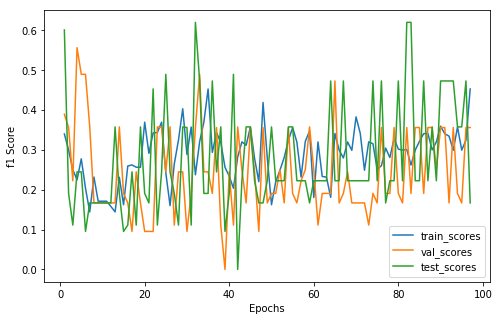

xxxxxxxxxxxxxx epoch: 97 xxxxxxxxxxxxxx
val_loss:  7.666502356529236
test_loss:  7.860090494155884
train_loss:  37.75638520717621
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       14      3       1
 1       15      3       5
 2        0      0       0


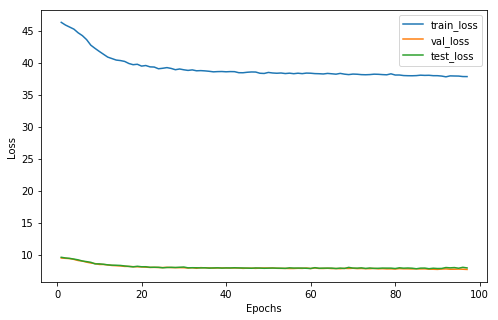

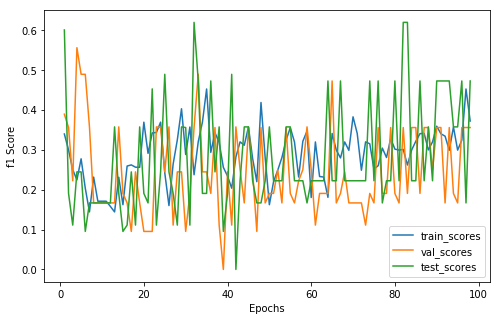

xxxxxxxxxxxxxx epoch: 98 xxxxxxxxxxxxxx
val_loss:  7.721277952194214
test_loss:  7.893726348876953
train_loss:  37.660990595817566
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       13      1       1
 1       16      5       5
 2        0      0       0


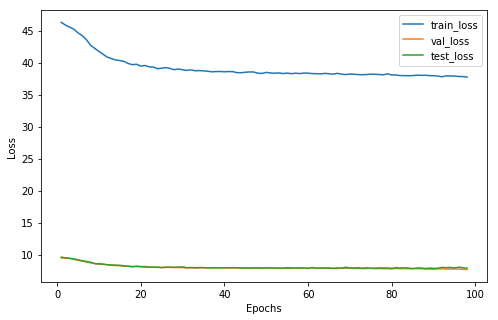

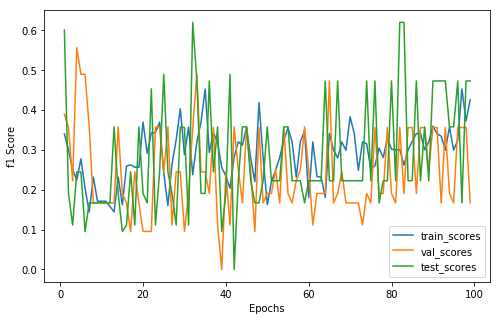

xxxxxxxxxxxxxx epoch: 99 xxxxxxxxxxxxxx
val_loss:  7.707334280014038
test_loss:  7.8555601835250854
train_loss:  37.63902938365936
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       13      2       1
 1       16      4       5
 2        0      0       0


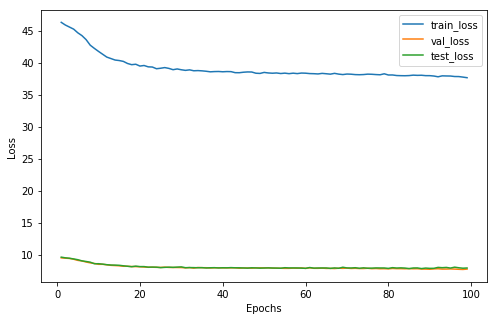

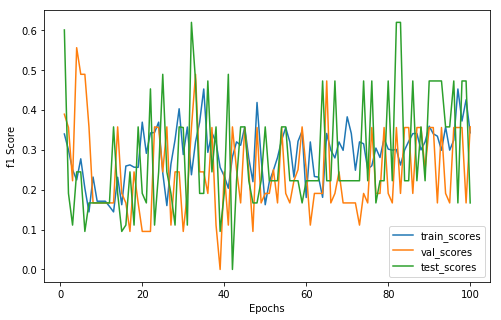

xxxxxxxxxxxxxx epoch: 100 xxxxxxxxxxxxxx
val_loss:  7.675168991088867
test_loss:  7.7876505851745605
train_loss:  37.68653392791748
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       11      2       1
 1       18      4       5
 2        0      0       0


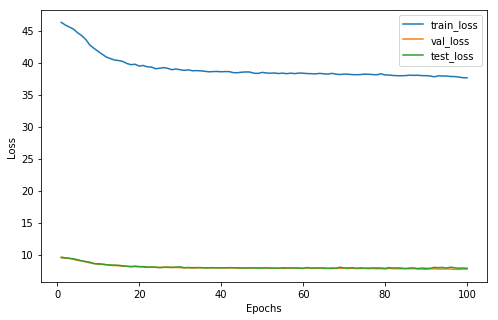

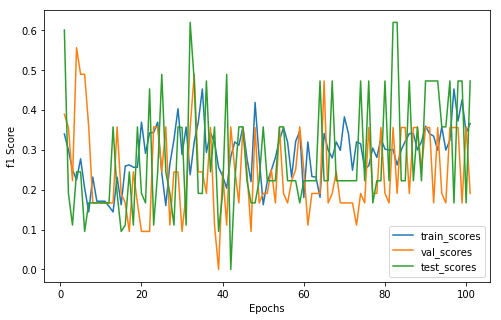

xxxxxxxxxxxxxx epoch: 101 xxxxxxxxxxxxxx
val_loss:  7.693117618560791
test_loss:  7.956503629684448
train_loss:  37.72033989429474
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0        9      2       1
 1       20      4       5
 2        0      0       0


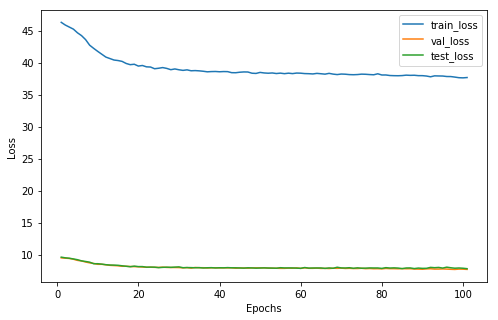

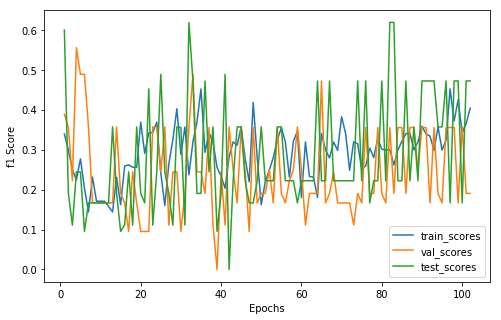

xxxxxxxxxxxxxx epoch: 102 xxxxxxxxxxxxxx
val_loss:  7.704673886299133
test_loss:  7.9785315990448
train_loss:  37.60756826400757
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       10      1       2
 1       19      5       4
 2        0      0       0


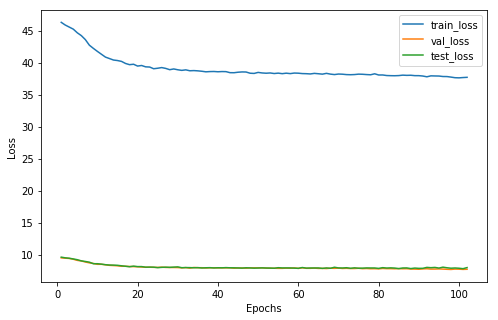

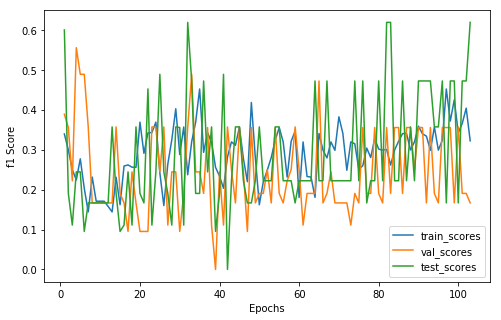

xxxxxxxxxxxxxx epoch: 103 xxxxxxxxxxxxxx
val_loss:  7.6674628257751465
test_loss:  7.976791977882385
train_loss:  37.62577688694
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      2       1
 1       17      4       5
 2        0      0       0


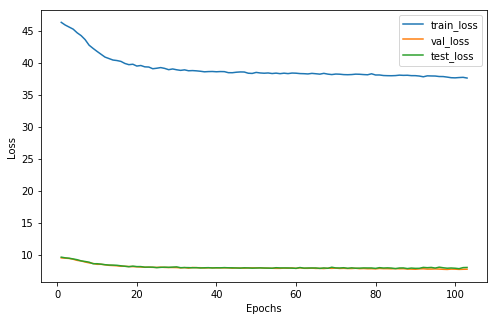

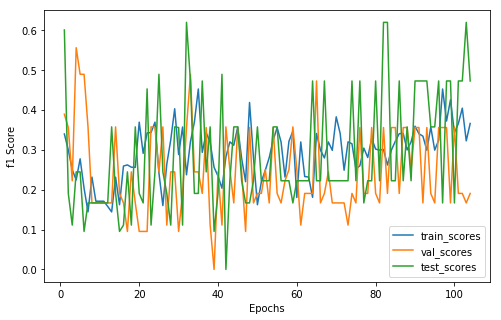

xxxxxxxxxxxxxx epoch: 104 xxxxxxxxxxxxxx
val_loss:  7.759666442871094
test_loss:  7.991026997566223
train_loss:  37.73000681400299
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       10      2       1
 1       19      4       5
 2        0      0       0


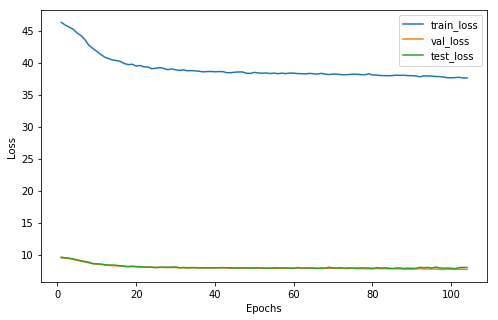

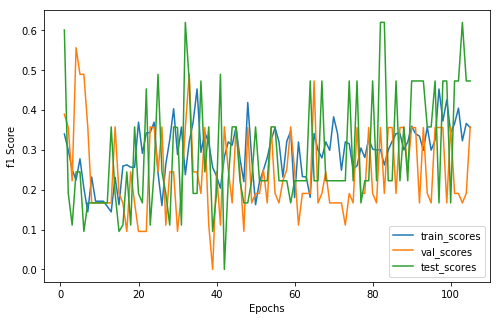

xxxxxxxxxxxxxx epoch: 105 xxxxxxxxxxxxxx
val_loss:  7.702532887458801
test_loss:  7.923046946525574
train_loss:  37.469688177108765
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      2       2
 1       17      4       4
 2        0      0       0


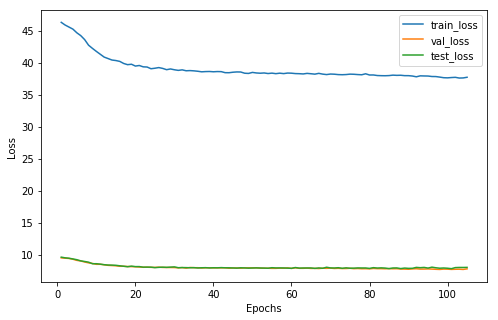

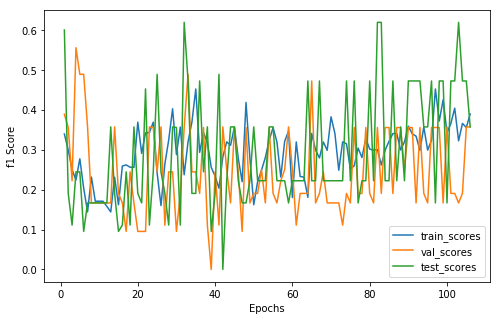

xxxxxxxxxxxxxx epoch: 106 xxxxxxxxxxxxxx
val_loss:  7.651553153991699
test_loss:  8.00985062122345
train_loss:  37.67090332508087
train_preds:  [tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       15      2       1
 1       14      4       5
 2        0      0       0


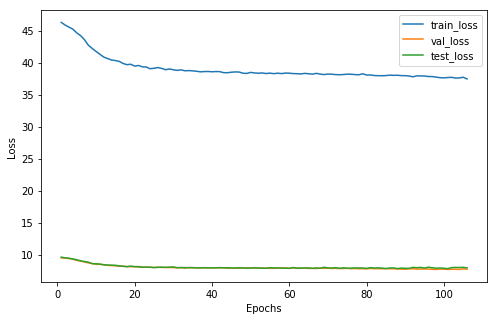

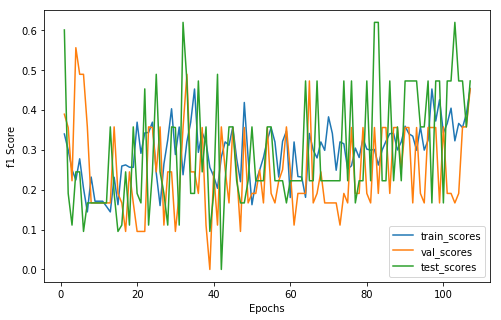

xxxxxxxxxxxxxx epoch: 107 xxxxxxxxxxxxxx
val_loss:  7.72860050201416
test_loss:  7.892072081565857
train_loss:  37.557958006858826
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      2       1
 1       17      4       5
 2        0      0       0


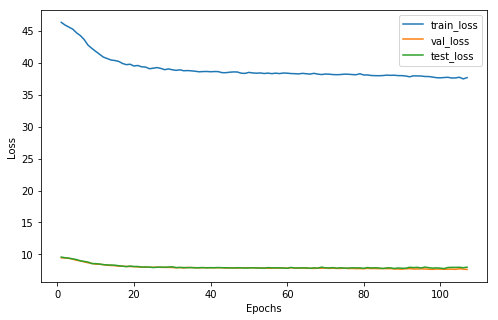

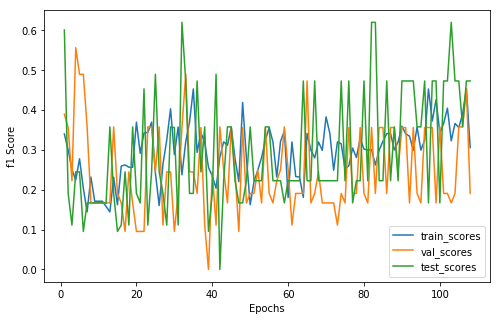

xxxxxxxxxxxxxx epoch: 108 xxxxxxxxxxxxxx
val_loss:  7.646302103996277
test_loss:  7.994190454483032
train_loss:  37.516069173812866
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       14      3       1
 1       15      3       5
 2        0      0       0


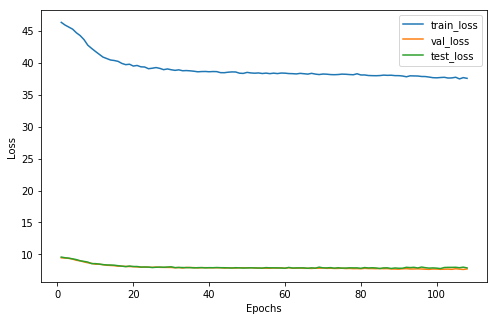

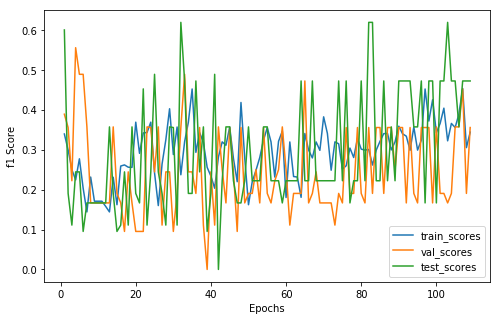

xxxxxxxxxxxxxx epoch: 109 xxxxxxxxxxxxxx
val_loss:  7.62129271030426
test_loss:  7.997476816177368
train_loss:  37.555575251579285
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      2       1
 1       17      4       5
 2        0      0       0


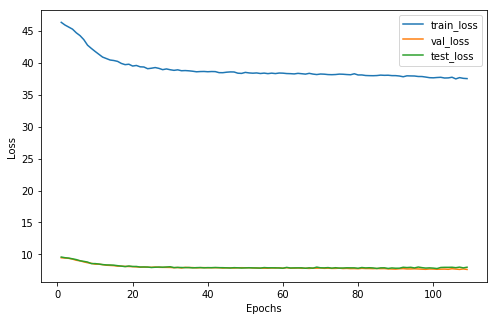

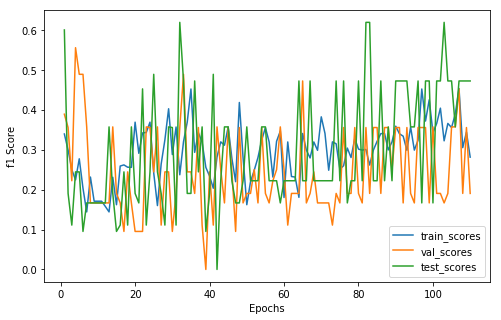

xxxxxxxxxxxxxx epoch: 110 xxxxxxxxxxxxxx
val_loss:  7.653154373168945
test_loss:  7.961085796356201
train_loss:  37.639474511146545
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       10      3       2
 1       19      3       4
 2        0      0       0


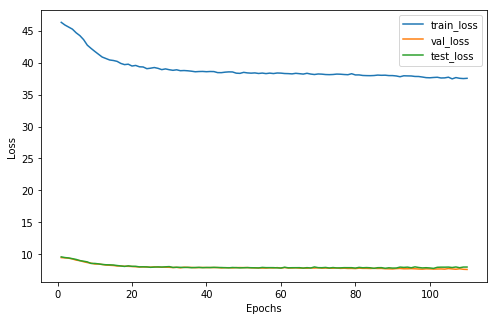

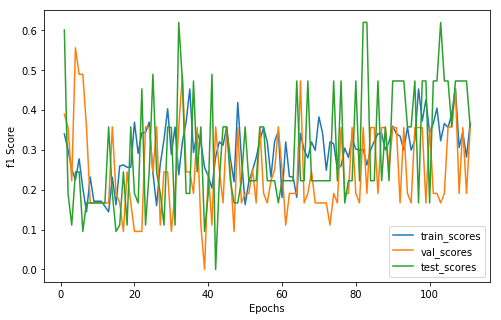

xxxxxxxxxxxxxx epoch: 111 xxxxxxxxxxxxxx
val_loss:  7.680196523666382
test_loss:  7.97489869594574
train_loss:  37.40596079826355
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       14      3       0
 1       15      3       6
 2        0      0       0


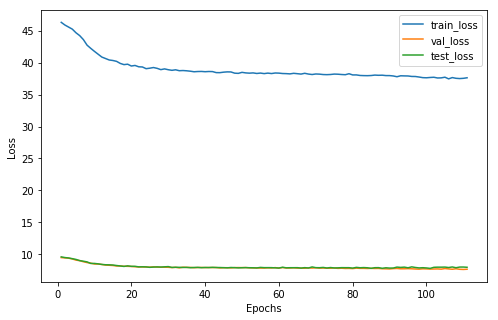

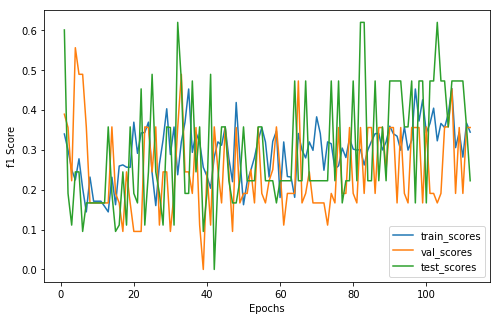

xxxxxxxxxxxxxx epoch: 112 xxxxxxxxxxxxxx
val_loss:  7.623521447181702
test_loss:  7.990601897239685
train_loss:  37.496126770973206
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      2       3
 1       17      4       3
 2        0      0       0


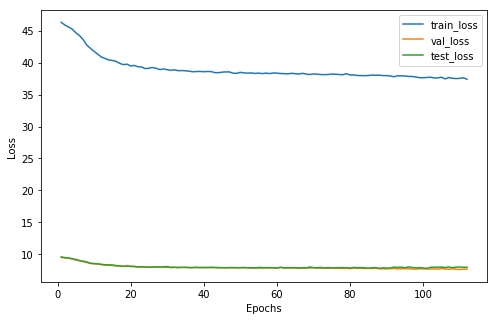

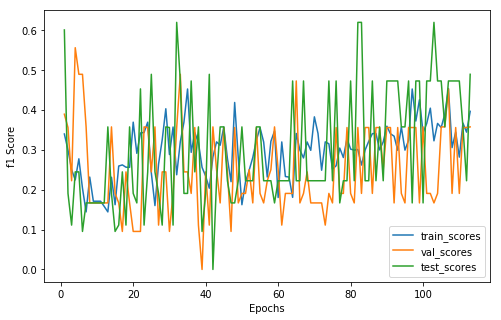

xxxxxxxxxxxxxx epoch: 113 xxxxxxxxxxxxxx
val_loss:  7.633404731750488
test_loss:  8.024637341499329
train_loss:  37.40248715877533
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       14      2       2
 1       15      4       4
 2        0      0       0


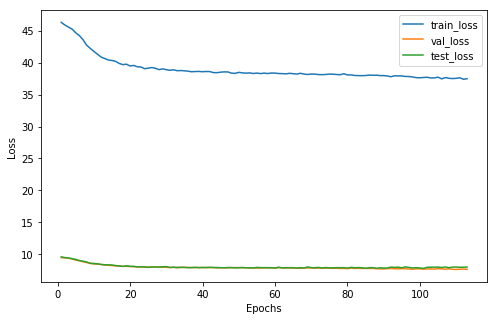

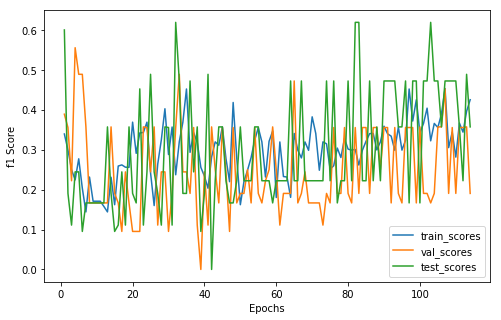

xxxxxxxxxxxxxx epoch: 114 xxxxxxxxxxxxxx
val_loss:  7.56866717338562
test_loss:  8.037935495376587
train_loss:  37.35766518115997
train_preds:  [tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       15      2       1
 1       14      4       5
 2        0      0       0


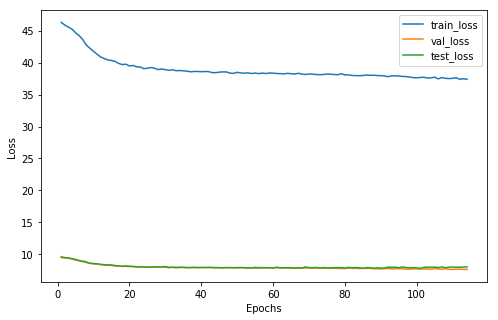

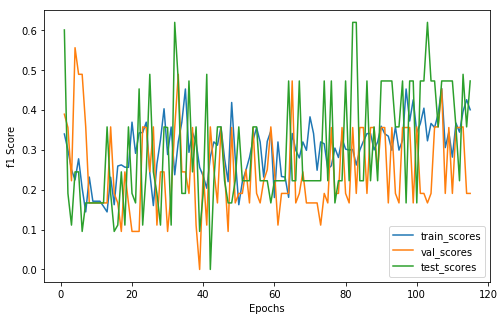

xxxxxxxxxxxxxx epoch: 115 xxxxxxxxxxxxxx
val_loss:  7.84174656867981
test_loss:  8.041830897331238
train_loss:  37.27164828777313
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       16      2       1
 1       13      4       5
 2        0      0       0


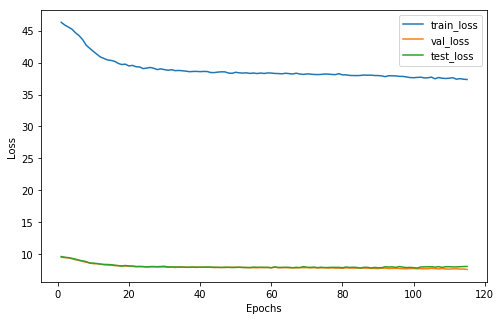

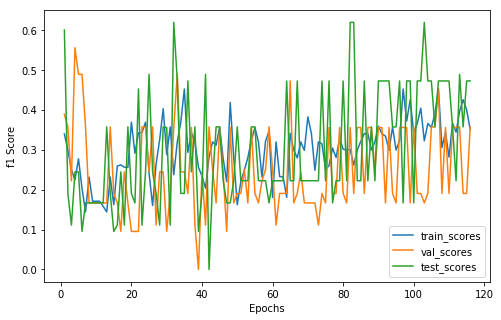

xxxxxxxxxxxxxx epoch: 116 xxxxxxxxxxxxxx
val_loss:  7.667597532272339
test_loss:  7.93593966960907
train_loss:  37.496227622032166
train_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(0), tensor(1), tensor(1), tensor(0), tensor(1), tensor(0)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       12      3       1
 1       17      3       5
 2        0      0       0


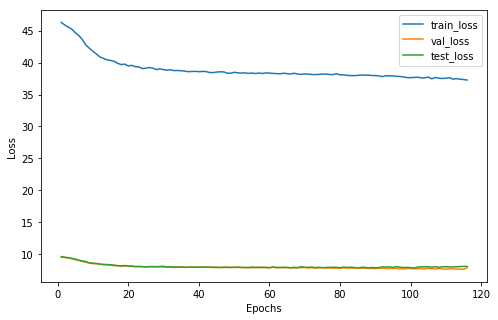

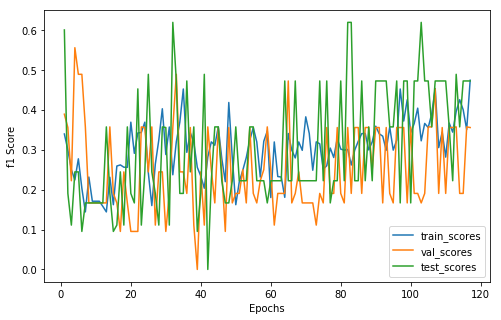

xxxxxxxxxxxxxx epoch: 117 xxxxxxxxxxxxxx
val_loss:  7.690043210983276
test_loss:  7.978608131408691
train_loss:  37.19055914878845
train_preds:  [tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1), tensor(1), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(0), tensor(1), tensor(0), tensor(0), tensor(0)]
val_preds:  [tensor(1), tensor(1), tensor(1), tensor(0), tensor(1), tensor(1)]
test_preds:  [tensor(0), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1)]
      Train    Val    Test
--  -------  -----  ------
 0       16      1       1
 1       13      5       5
 2        0      0       0


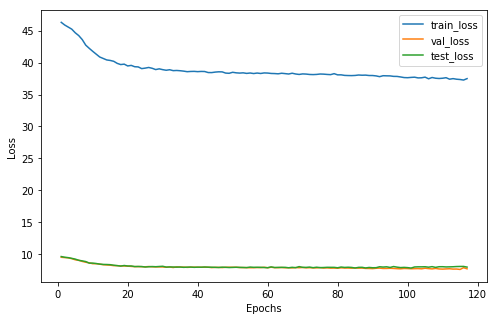

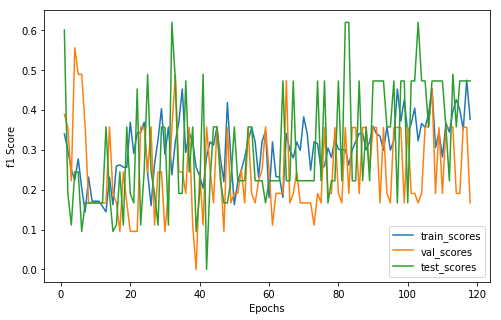

xxxxxxxxxxxxxx epoch: 118 xxxxxxxxxxxxxx


KeyboardInterrupt: 

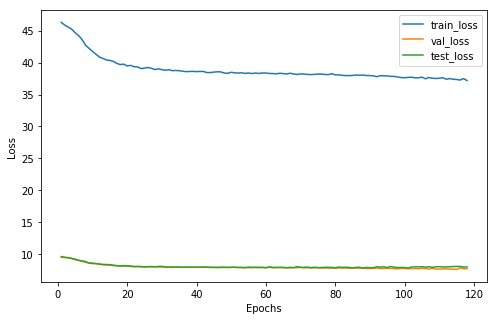

In [27]:
loss_over_epochs = {
    "train_loss" : [],
    "val_loss" : [],
    "test_loss" : []
}

scores_over_epochs = {
    "train_scores" : [],
    "val_scores" : [],
    "test_scores" : []
}

for epoch in range(n_epochs):
    print("xxxxxxxxxxxxxx epoch: {} xxxxxxxxxxxxxx".format(epoch))
    train_loss, train_labels, train_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion, optimizer)
    val_loss, val_labels, val_preds =  trainer.evaluate_set(data, 'val_ids', model, criterion)
    test_loss, test_labels, test_preds =  trainer.evaluate_set(data, 'test_ids', model, criterion)
    
    print(statistics.get_train_test_val_label_counts_from_predictions(train_preds, val_preds, test_preds))
    
    loss_over_epochs['train_loss'].append(train_loss)
    loss_over_epochs['val_loss'].append(val_loss)
    loss_over_epochs['test_loss'].append(test_loss)
    
    scores_over_epochs['train_scores'].append(metrics.precision_recall_fscore_support(train_labels,
                                                                                     train_preds, 
                                                                                     average='macro'))
    scores_over_epochs['val_scores'].append(metrics.precision_recall_fscore_support(val_labels, 
                                                                                       val_preds, 
                                                                                   average='macro'))
    scores_over_epochs['test_scores'].append( metrics.precision_recall_fscore_support(test_labels,
                                                                                     test_preds,
                                                                                     average='macro'))
    
    plotting.plot_score_over_n_epochs(scores_over_epochs, score_type='f1', fig_size=(8,5))
    plotting.plot_loss_over_n_epochs(loss_over_epochs, fig_size=(8, 5))
    
